<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/R%E8%AA%9E%E8%A8%80_%E9%97%9C%E8%81%AF%E8%A6%8F%E5%89%87(%E8%B3%BC%E7%89%A9%E7%B1%83%E5%88%86%E6%9E%90)_Association_Rules_Steve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 關聯規則(購物籃分析) Association Rules ----
產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

# 購物籃分析(Basket Analysis)
https://ithelp.ithome.com.tw/articles/10217912

『購物籃分析』(Basket Analysis)則是以商品的角度行銷，
- 對顧客進行『交叉銷售』(cross selling)或
- 『追加銷售』(up selling)，
- cross selling是推薦顧客相關的商品，例如，牙刷與牙膏，而
- up selling 則是推薦顧客一個更好、更貴(我自己加的)的商品。

最經典的例子，就是尿布與啤酒，WalMart發現美國年輕的夫妻在週五晚上去超市採購時，如果買了尿布，也會買啤酒，為什麼呢? 經過調查，周末時他們會帶幼兒去郊外野餐，所以，會同時購買者兩項商品，

因此，WalMart就將尿布與啤酒擺在同一個櫃位，以方便顧客一起購買，這就是所謂的『交叉銷售』(cross selling)，而要找出商品關聯的其中一項技術就是『購物籃分析』。

『購物籃』一詞早已落伍，現在超市都是『購物車』(Shopping cart)，可見這個演算法很早就被發明，但是，還是非常實用，只要能找出商品採買的關聯性，就可進而利用各種策略提高公司的營收。下圖就是很好的例子：

1. 洗滌劑要放在哪裡，可以賣得最好?
2. 如果顧客同時買了洗滌劑及果汁，他們是否會再買窗戶清潔劑?
3. 蘇打水與香蕉是否會同時購買? 蘇打水品牌是否有影響?
4. 鄰近的商品特性是否會影響顧客的採買內容?

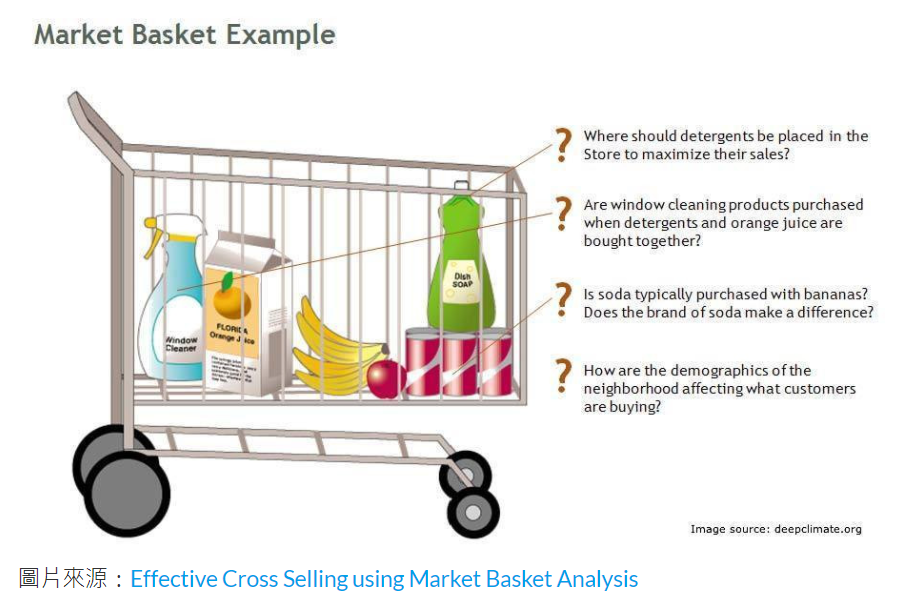

#『購物籃分析』(Basket Analysis)
購物籃分析，也稱為關聯分析(Affinity Analysis or Association Rule)，要找出這種關聯，不需要高深的數學，只要一些簡單的統計，就可以挖掘出資料的背後隱藏的模式(Pattern)。

購物籃分析通常使用三個統計量：

1. 支援(Support)：購買X的發票個數 / 總發票數
2. 信心(Confidence)：同時購買X及Y的發票個數 / 購買X的發票個數，亦即條件機率P(Y|X)，購買X的顧客，有多少顧客也買了Y，Support(X ∩ Y) / Support(X)。
3. 增益(Lift)：P(X ∩ Y) / (P(X) * P(Y))，若值接近1表示X、Y互相獨立，愈高表示關聯性愈強。

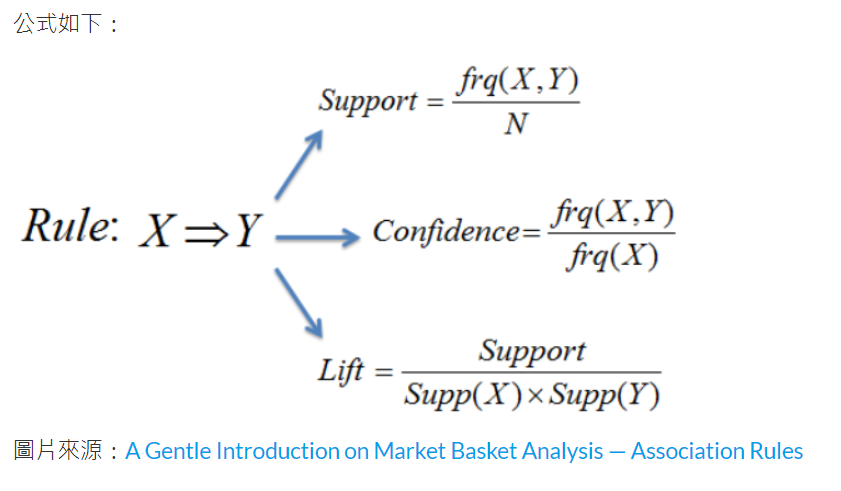

舉一個範例說明，有5個購物籃，分別採買A、B、C、D、E 5種商品，依照公式計算結果如下：

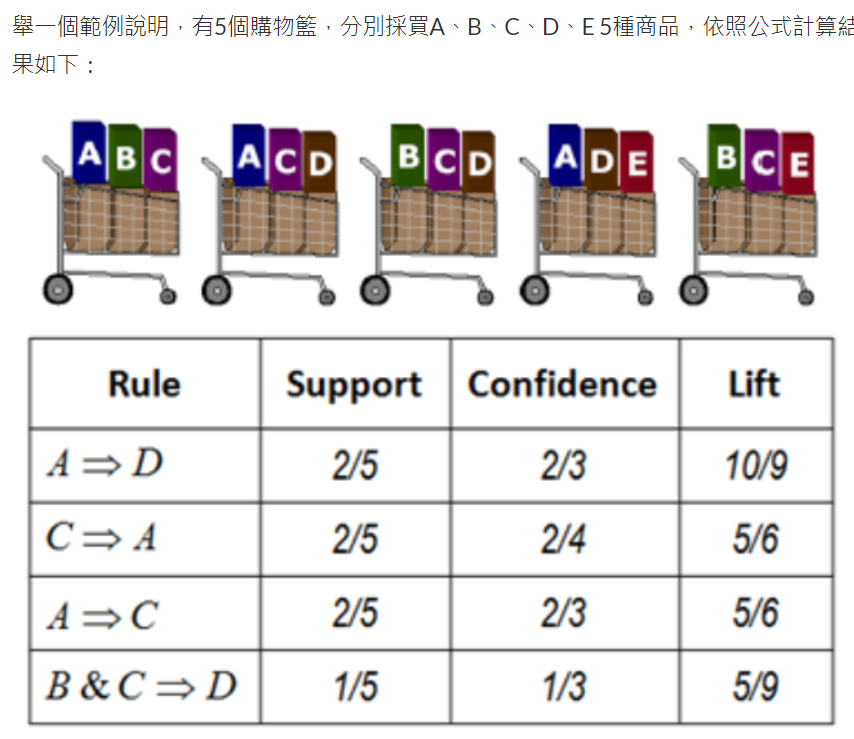

# 1.相關套件安裝與資料的載入

In [ ]:
install.packages("arules")
install.packages("arulesViz")
install.packages("RColorBrewer")


#套件與資料的載入
library(arules)        # association rules (an S4 object orientation package)
library(arulesViz)     # data visualization of association rules
library(RColorBrewer)  # color palettes for plots
library(cluster)       # cluster analysis for market segmentation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [ ]:
??arules
# https://cran.r-project.org/web/packages/arules/arules.pdf
# Mining Association Rules and Frequent Itemsets
# Description Provides the infrastructure for representing,
# manipulating and analyzing transaction data and patterns 
# (frequent itemsets and association rules). Also provides interfaces to
# C implementations of the association mining algorithms Apriori and Eclat
# by C. Borgelt.

# 2.關聯規則分析與檔案格式 -----
- 關聯規則分析的規則是指 X →Y ，X和Y為物件的集合
- X稱為前項（antecedents，R軟體稱為lhs,即lefte hand sides），
- Y稱為後項（consequents，R軟體稱為rhs,即right hand sides）。
- 我們舉以下的Transaction項目列表為例：

In [ ]:
txn <- list(c("Bread", "Milk"), 
       c("Bread", "Diaper", "Beer", "Eggs"), 
       c("Milk", "Diaper", "Beer", "Coke"), 
       c("Bread", "Milk", "Diaper", "Beer"), 
       c("Bread", "Milk", "Diaper", "Coke"))
txn
# [[1]]
# [1] "Bread" "Milk" 
# [[2]]
# [1] "Bread"  "Diaper" "Beer"   "Eggs"  
# [[3]]
# [1] "Milk"   "Diaper" "Beer"   "Coke"  
# [[4]]
# [1] "Bread"  "Milk"   "Diaper" "Beer"  
# [[5]]
# [1] "Bread"  "Milk"   "Diaper" "Coke"  

[[1]]
[1] "Bread" "Milk" 

[[2]]
[1] "Bread"  "Diaper" "Beer"   "Eggs"  

[[3]]
[1] "Milk"   "Diaper" "Beer"   "Coke"  

[[4]]
[1] "Bread"  "Milk"   "Diaper" "Beer"  

[[5]]
[1] "Bread"  "Milk"   "Diaper" "Coke"

# 3.規則範例：
- {Milk, Diaper} >> {Beer}         (s=0.4, c=0.67) s=2/5, c=2/3
- {Milk, Beer}   >> {Diaper}       (s=0.4, c=1.0)  s=?  , c=?   << 自行練習
- {Diaper, Beer} >> {Milk}         (s=0.4, c=0.67) s=?  , c=?   << 自行練習
- {Beer}         >> {Milk, Diaper} (s=0.4, c=0.67) s=?  , c=?   << 自行練習

- [1] {Bread,Milk}            
- [2] {Beer,Bread,Diaper,Eggs}
- [3] {Beer,Coke,Diaper,Milk} 
- [4] {Beer,Bread,Diaper,Milk}
- [5] {Bread,Coke,Diaper,Milk}
1. 其中s指支援度support，亦即X和Y同時出現的次數 ÷ 所有交易數；
2. c指信賴度confidence，亦即X和Y同時出現的次數 ÷ X出現的次數。
3. 至於提昇lift則是指support/((support(X)*(support(Y)) 0.4 / (0.4*)

In [ ]:
txn <- as(txn, "transactions")
txn
# transactions in sparse format with
# 5 transactions (rows) and
# 6 items (columns)

transactions in sparse format with
 5 transactions (rows) and
 6 items (columns)

In [ ]:
inspect(txn)
#      items                   
# [1] {Bread,Milk}            
# [2] {Beer,Bread,Diaper,Eggs}
# [3] {Beer,Coke,Diaper,Milk} 
# [4] {Beer,Bread,Diaper,Milk}
# [5] {Bread,Coke,Diaper,Milk}

    items                      
[1] {Bread, Milk}              
[2] {Beer, Bread, Diaper, Eggs}
[3] {Beer, Coke, Diaper, Milk} 
[4] {Beer, Bread, Diaper, Milk}
[5] {Bread, Coke, Diaper, Milk}


In [ ]:
txnMat <- as(txn, "itemMatrix")
txnMat
# itemMatrix in sparse format with
# 5 rows (elements/transactions) and
# 6 columns (items)

itemMatrix in sparse format with
 5 rows (elements/transactions) and
 6 columns (items)

In [ ]:
inspect(txnMat)
#     items                   
# [1] {Bread,Milk}            
# [2] {Beer,Bread,Diaper,Eggs}
# [3] {Beer,Coke,Diaper,Milk} 
# [4] {Beer,Bread,Diaper,Milk}
# [5] {Bread,Coke,Diaper,Milk}

    items                      
[1] {Bread, Milk}              
[2] {Beer, Bread, Diaper, Eggs}
[3] {Beer, Coke, Diaper, Milk} 
[4] {Beer, Bread, Diaper, Milk}
[5] {Bread, Coke, Diaper, Milk}


In [ ]:
as(txnMat, "matrix")
#       Beer Bread  Coke Diaper  Eggs  Milk
# [1,] FALSE  TRUE FALSE  FALSE FALSE  TRUE
# [2,]  TRUE  TRUE FALSE   TRUE  TRUE FALSE
# [3,]  TRUE FALSE  TRUE   TRUE FALSE  TRUE
# [4,]  TRUE  TRUE FALSE   TRUE FALSE  TRUE
# [5,] FALSE  TRUE  TRUE   TRUE FALSE  TRUE

Beer,Bread,Coke,Diaper,Eggs,Milk
FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,FALSE,TRUE
FALSE,TRUE,TRUE,TRUE,FALSE,TRUE


In [ ]:
txnMat2 <- as(txn, "matrix")
txnMat2

Beer,Bread,Coke,Diaper,Eggs,Milk
FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
TRUE,FALSE,TRUE,TRUE,FALSE,TRUE
TRUE,TRUE,FALSE,TRUE,FALSE,TRUE
FALSE,TRUE,TRUE,TRUE,FALSE,TRUE


In [ ]:
itemFrequency(txn)
# Beer  Bread   Coke Diaper   Eggs   Milk 
# 0.6    0.8    0.4    0.8    0.2    0.8 

Beer  Bread   Coke Diaper   Eggs   Milk 
   0.6    0.8    0.4    0.8    0.2    0.8

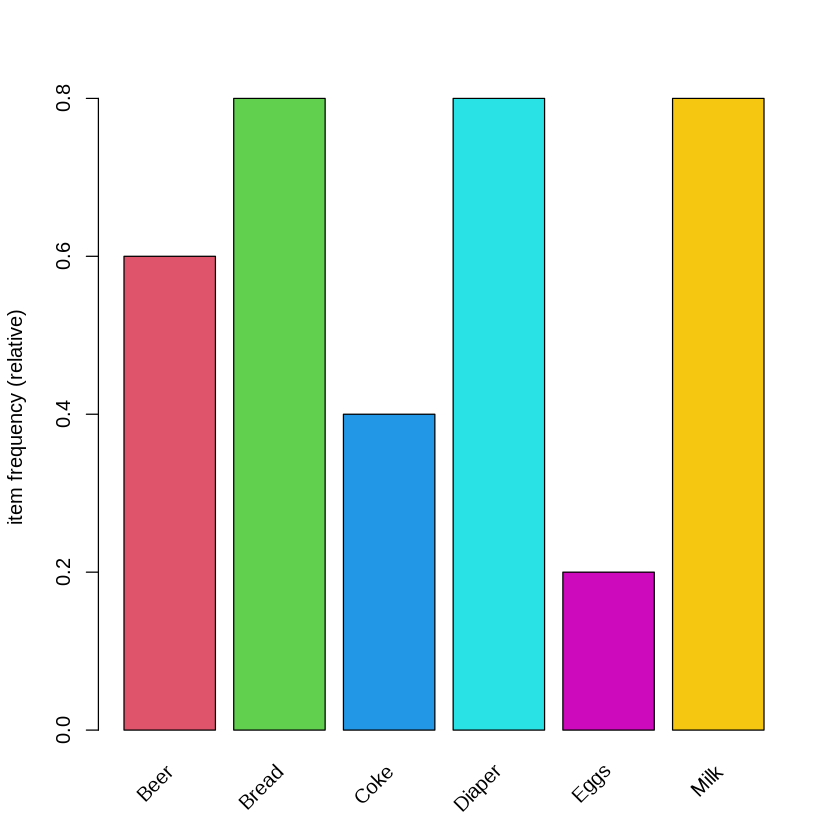

In [ ]:
itemFrequencyPlot(txn, col = 2:10)

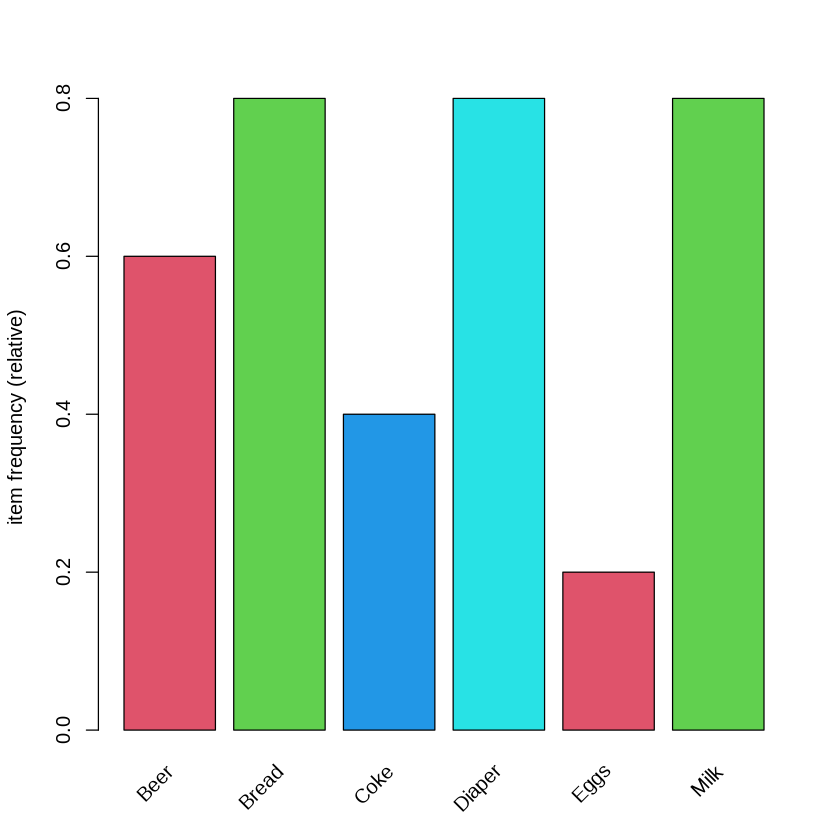

In [ ]:
itemFrequencyPlot(txn, col = 2:length(txn))

In [ ]:
colSums(as(txnMat, "matrix")) # same as above
# Beer  Bread   Coke Diaper   Eggs   Milk 
#    3      4      2      4      1      4 

Beer  Bread   Coke Diaper   Eggs   Milk 
     3      4      2      4      1      4

In [ ]:
itemFrequency(txn, type="absolute")
# Beer  Bread   Coke Diaper   Eggs   Milk 
#    3      4      2      4      1      4 

Beer  Bread   Coke Diaper   Eggs   Milk 
     3      4      2      4      1      4

In [ ]:
colSums(as(txnMat, "matrix"))/nrow(txnMat) # same as above
# Beer  Bread   Coke Diaper   Eggs   Milk 
# 0.6    0.8    0.4    0.8    0.2    0.8 

Beer  Bread   Coke Diaper   Eggs   Milk 
   0.6    0.8    0.4    0.8    0.2    0.8

In [ ]:
?apriori
# Mining Associations with Apriori
# Usage
# apriori(data, parameter = NULL, appearance = NULL, control = NULL)
# parameter	
# object of class APparameter or named list. The default behavior is to mine rules with minimum support of 0.1, 
# minimum confidence of 0.8, maximum of 10 items (maxlen), and a maximal time for subset checking of 5 seconds (maxtime).

In [ ]:
rule01 <- apriori(txn, parameter=list(supp=0.2, conf=0.8, maxlen=5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [31 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rule01a <- apriori(txn, parameter=list(supp=0.4, conf=0.8, maxlen=5))  # 用較高的標準 supp=0.8 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rule01d <- apriori(txn)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [31 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rule012 <- apriori(txn, parameter=list(supp=0.2, conf=0.8, maxlen=2))
#default是0.1, 0.8, 10
# Apriori
# 
# Parameter specification:
# confidence minval smax arem  aval originalSupport maxtime support minlen maxlen target   ext
#        0.8    0.1    1 none FALSE            TRUE       5     0.2      1      5  rules FALSE
# 
# Algorithmic control:
#  filter tree heap memopt load sort verbose
#     0.1 TRUE TRUE  FALSE TRUE    2    TRUE
# 
# Absolute minimum support count: 1 
# 
# set item appearances ...[0 item(s)] done [0.00s].
# set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
# sorting and recoding items ... [6 item(s)] done [0.00s].
# creating transaction tree ... done [0.00s].
# checking subsets of size 1 2 3 4 done [0.00s].
# writing ... [31 rule(s)] done [0.00s].
# creating S4 object  ... done [0.00s].

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(txn, parameter = list(supp = 0.2, conf = 0.8, maxlen = 2)):
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.00s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(rule01)
#      lhs                    rhs      support confidence lift     count
# [1]  {}                  => {Milk}   0.8     0.8        1.000000 4    
# [2]  {}                  => {Bread}  0.8     0.8        1.000000 4    
# [3]  {}                  => {Diaper} 0.8     0.8        1.000000 4    
# [4]  {Eggs}              => {Beer}   0.2     1.0        1.666667 1    
# [5]  {Eggs}              => {Bread}  0.2     1.0        1.250000 1    
# [6]  {Eggs}              => {Diaper} 0.2     1.0        1.250000 1    
# [7]  {Coke}              => {Milk}   0.4     1.0        1.250000 2    
# [8]  {Coke}              => {Diaper} 0.4     1.0        1.250000 2    
# [9]  {Beer}              => {Diaper} 0.6     1.0        1.250000 3    
# [10] {Beer,Eggs}         => {Bread}  0.2     1.0        1.250000 1    
# [11] {Bread,Eggs}        => {Beer}   0.2     1.0        1.666667 1    
# [12] {Beer,Eggs}         => {Diaper} 0.2     1.0        1.250000 1    
# [13] {Diaper,Eggs}       => {Beer}   0.2     1.0        1.666667 1    
# [14] {Bread,Eggs}        => {Diaper} 0.2     1.0        1.250000 1    
# [15] {Diaper,Eggs}       => {Bread}  0.2     1.0        1.250000 1    
# [16] {Beer,Coke}         => {Milk}   0.2     1.0        1.250000 1    
# [17] {Beer,Coke}         => {Diaper} 0.2     1.0        1.250000 1    
# [18] {Bread,Coke}        => {Milk}   0.2     1.0        1.250000 1    
# [19] {Coke,Milk}         => {Diaper} 0.4     1.0        1.250000 2    
# [20] {Coke,Diaper}       => {Milk}   0.4     1.0        1.250000 2    
# [21] {Bread,Coke}        => {Diaper} 0.2     1.0        1.250000 1    
# [22] {Beer,Milk}         => {Diaper} 0.4     1.0        1.250000 2    
# [23] {Beer,Bread}        => {Diaper} 0.4     1.0        1.250000 2    
# [24] {Beer,Bread,Eggs}   => {Diaper} 0.2     1.0        1.250000 1    
# [25] {Beer,Diaper,Eggs}  => {Bread}  0.2     1.0        1.250000 1    
# [26] {Bread,Diaper,Eggs} => {Beer}   0.2     1.0        1.666667 1    
# [27] {Beer,Coke,Milk}    => {Diaper} 0.2     1.0        1.250000 1    
# [28] {Beer,Coke,Diaper}  => {Milk}   0.2     1.0        1.250000 1    
# [29] {Bread,Coke,Milk}   => {Diaper} 0.2     1.0        1.250000 1    
# [30] {Bread,Coke,Diaper} => {Milk}   0.2     1.0        1.250000 1    
# [31] {Beer,Bread,Milk}   => {Diaper} 0.2     1.0        1.250000 1 

     lhs                      rhs      support confidence coverage lift    
[1]  {}                    => {Milk}   0.8     0.8        1.0      1.000000
[2]  {}                    => {Bread}  0.8     0.8        1.0      1.000000
[3]  {}                    => {Diaper} 0.8     0.8        1.0      1.000000
[4]  {Eggs}                => {Beer}   0.2     1.0        0.2      1.666667
[5]  {Eggs}                => {Bread}  0.2     1.0        0.2      1.250000
[6]  {Eggs}                => {Diaper} 0.2     1.0        0.2      1.250000
[7]  {Coke}                => {Milk}   0.4     1.0        0.4      1.250000
[8]  {Coke}                => {Diaper} 0.4     1.0        0.4      1.250000
[9]  {Beer}                => {Diaper} 0.6     1.0        0.6      1.250000
[10] {Beer, Eggs}          => {Bread}  0.2     1.0        0.2      1.250000
[11] {Bread, Eggs}         => {Beer}   0.2     1.0        0.2      1.666667
[12] {Beer, Eggs}          => {Diaper} 0.2     1.0        0.2      1.250000
[13] {Diaper

In [ ]:
inspect(rule01a)

     lhs               rhs      support confidence coverage lift count
[1]  {}             => {Milk}   0.8     0.8        1.0      1.00 4    
[2]  {}             => {Bread}  0.8     0.8        1.0      1.00 4    
[3]  {}             => {Diaper} 0.8     0.8        1.0      1.00 4    
[4]  {Coke}         => {Milk}   0.4     1.0        0.4      1.25 2    
[5]  {Coke}         => {Diaper} 0.4     1.0        0.4      1.25 2    
[6]  {Beer}         => {Diaper} 0.6     1.0        0.6      1.25 3    
[7]  {Coke, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[8]  {Coke, Diaper} => {Milk}   0.4     1.0        0.4      1.25 2    
[9]  {Beer, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[10] {Beer, Bread}  => {Diaper} 0.4     1.0        0.4      1.25 2    


In [ ]:
inspect(rule01d)

     lhs                      rhs      support confidence coverage lift    
[1]  {}                    => {Milk}   0.8     0.8        1.0      1.000000
[2]  {}                    => {Bread}  0.8     0.8        1.0      1.000000
[3]  {}                    => {Diaper} 0.8     0.8        1.0      1.000000
[4]  {Eggs}                => {Beer}   0.2     1.0        0.2      1.666667
[5]  {Eggs}                => {Bread}  0.2     1.0        0.2      1.250000
[6]  {Eggs}                => {Diaper} 0.2     1.0        0.2      1.250000
[7]  {Coke}                => {Milk}   0.4     1.0        0.4      1.250000
[8]  {Coke}                => {Diaper} 0.4     1.0        0.4      1.250000
[9]  {Beer}                => {Diaper} 0.6     1.0        0.6      1.250000
[10] {Beer, Eggs}          => {Bread}  0.2     1.0        0.2      1.250000
[11] {Bread, Eggs}         => {Beer}   0.2     1.0        0.2      1.666667
[12] {Beer, Eggs}          => {Diaper} 0.2     1.0        0.2      1.250000
[13] {Diaper

In [ ]:
inspect(rule012)

    lhs       rhs      support confidence coverage lift     count
[1] {}     => {Milk}   0.8     0.8        1.0      1.000000 4    
[2] {}     => {Bread}  0.8     0.8        1.0      1.000000 4    
[3] {}     => {Diaper} 0.8     0.8        1.0      1.000000 4    
[4] {Eggs} => {Beer}   0.2     1.0        0.2      1.666667 1    
[5] {Eggs} => {Bread}  0.2     1.0        0.2      1.250000 1    
[6] {Eggs} => {Diaper} 0.2     1.0        0.2      1.250000 1    
[7] {Coke} => {Milk}   0.4     1.0        0.4      1.250000 2    
[8] {Coke} => {Diaper} 0.4     1.0        0.4      1.250000 2    
[9] {Beer} => {Diaper} 0.6     1.0        0.6      1.250000 3    


In [ ]:
summary(rule01)
# set of 31 rules
# 
# rule length distribution (lhs + rhs):sizes
# 1  2  3  4 
# 3  6 14  8  (3 + 6 +14 + 8 = 31)
# 
#  Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
# 1.000   2.000   3.000   2.871   3.500   4.000 
# 
# summary of quality measures:
#     support         confidence          lift           count      
# Min.   :0.2000   Min.   :0.8000   Min.   :1.000   Min.   :1.000  
# 1st Qu.:0.2000   1st Qu.:1.0000   1st Qu.:1.250   1st Qu.:1.000  
# Median :0.2000   Median :1.0000   Median :1.250   Median :1.000  
# Mean   :0.3097   Mean   :0.9806   Mean   :1.280   Mean   :1.548  
# 3rd Qu.:0.4000   3rd Qu.:1.0000   3rd Qu.:1.250   3rd Qu.:2.000  
# Max.   :0.8000   Max.   :1.0000   Max.   :1.667   Max.   :4.000  
# 
# mining info:
# data ntransactions support confidence
#  txn             5     0.2        0.8

set of 31 rules

rule length distribution (lhs + rhs):sizes
 1  2  3  4 
 3  6 14  8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.871   3.500   4.000 

summary of quality measures:
    support         confidence        coverage          lift      
 Min.   :0.2000   Min.   :0.8000   Min.   :0.200   Min.   :1.000  
 1st Qu.:0.2000   1st Qu.:1.0000   1st Qu.:0.200   1st Qu.:1.250  
 Median :0.2000   Median :1.0000   Median :0.200   Median :1.250  
 Mean   :0.3097   Mean   :0.9806   Mean   :0.329   Mean   :1.280  
 3rd Qu.:0.4000   3rd Qu.:1.0000   3rd Qu.:0.400   3rd Qu.:1.250  
 Max.   :0.8000   Max.   :1.0000   Max.   :1.000   Max.   :1.667  
     count      
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.548  
 3rd Qu.:2.000  
 Max.   :4.000  

mining info:
 data ntransactions support confidence
  txn             5     0.2        0.8
                                                                      call
 apriori(data = txn, parameter

In [ ]:
summary(rule01a)

set of 10 rules

rule length distribution (lhs + rhs):sizes
1 2 3 
3 3 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.25    2.00    2.10    3.00    3.00 

summary of quality measures:
    support       confidence      coverage        lift           count     
 Min.   :0.40   Min.   :0.80   Min.   :0.4   Min.   :1.000   Min.   :2.00  
 1st Qu.:0.40   1st Qu.:0.85   1st Qu.:0.4   1st Qu.:1.062   1st Qu.:2.00  
 Median :0.40   Median :1.00   Median :0.4   Median :1.250   Median :2.00  
 Mean   :0.54   Mean   :0.94   Mean   :0.6   Mean   :1.175   Mean   :2.70  
 3rd Qu.:0.75   3rd Qu.:1.00   3rd Qu.:0.9   3rd Qu.:1.250   3rd Qu.:3.75  
 Max.   :0.80   Max.   :1.00   Max.   :1.0   Max.   :1.250   Max.   :4.00  

mining info:
 data ntransactions support confidence
  txn             5     0.4        0.8
                                                                      call
 apriori(data = txn, parameter = list(supp = 0.4, conf = 0.8, maxlen = 5))

In [ ]:
inspect(head(sort(rule01, by="support"),10))
#      lhs              rhs      support confidence lift count
# [1]  {}            => {Milk}   0.8     0.8        1.00 4    
# [2]  {}            => {Bread}  0.8     0.8        1.00 4    
# [3]  {}            => {Diaper} 0.8     0.8        1.00 4    
# [4]  {Beer}        => {Diaper} 0.6     1.0        1.25 3    
# [5]  {Coke}        => {Milk}   0.4     1.0        1.25 2    
# [6]  {Coke}        => {Diaper} 0.4     1.0        1.25 2    
# [7]  {Coke,Milk}   => {Diaper} 0.4     1.0        1.25 2    
# [8]  {Coke,Diaper} => {Milk}   0.4     1.0        1.25 2    
# [9]  {Beer,Milk}   => {Diaper} 0.4     1.0        1.25 2    
# [10] {Beer,Bread}  => {Diaper} 0.4     1.0        1.25 2 

     lhs               rhs      support confidence coverage lift count
[1]  {}             => {Milk}   0.8     0.8        1.0      1.00 4    
[2]  {}             => {Bread}  0.8     0.8        1.0      1.00 4    
[3]  {}             => {Diaper} 0.8     0.8        1.0      1.00 4    
[4]  {Beer}         => {Diaper} 0.6     1.0        0.6      1.25 3    
[5]  {Coke}         => {Milk}   0.4     1.0        0.4      1.25 2    
[6]  {Coke}         => {Diaper} 0.4     1.0        0.4      1.25 2    
[7]  {Coke, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[8]  {Coke, Diaper} => {Milk}   0.4     1.0        0.4      1.25 2    
[9]  {Beer, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[10] {Beer, Bread}  => {Diaper} 0.4     1.0        0.4      1.25 2    


In [ ]:
inspect(head(sort(rule01a, by="support"),10))

     lhs               rhs      support confidence coverage lift count
[1]  {}             => {Milk}   0.8     0.8        1.0      1.00 4    
[2]  {}             => {Bread}  0.8     0.8        1.0      1.00 4    
[3]  {}             => {Diaper} 0.8     0.8        1.0      1.00 4    
[4]  {Beer}         => {Diaper} 0.6     1.0        0.6      1.25 3    
[5]  {Coke}         => {Milk}   0.4     1.0        0.4      1.25 2    
[6]  {Coke}         => {Diaper} 0.4     1.0        0.4      1.25 2    
[7]  {Coke, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[8]  {Coke, Diaper} => {Milk}   0.4     1.0        0.4      1.25 2    
[9]  {Beer, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[10] {Beer, Bread}  => {Diaper} 0.4     1.0        0.4      1.25 2    


In [ ]:
inspect(head(sort(rule01,by="confidence"),10))
#      lhs              rhs      support confidence lift     count
# [1]  {Eggs}        => {Beer}   0.2     1          1.666667 1    
# [2]  {Eggs}        => {Bread}  0.2     1          1.250000 1    
# [3]  {Eggs}        => {Diaper} 0.2     1          1.250000 1    
# [4]  {Coke}        => {Milk}   0.4     1          1.250000 2    
# [5]  {Coke}        => {Diaper} 0.4     1          1.250000 2    
# [6]  {Beer}        => {Diaper} 0.6     1          1.250000 3    
# [7]  {Beer,Eggs}   => {Bread}  0.2     1          1.250000 1    
# [8]  {Bread,Eggs}  => {Beer}   0.2     1          1.666667 1    
# [9]  {Beer,Eggs}   => {Diaper} 0.2     1          1.250000 1    
# [10] {Diaper,Eggs} => {Beer}   0.2     1          1.666667 1 

     lhs               rhs      support confidence coverage lift     count
[1]  {Eggs}         => {Beer}   0.2     1          0.2      1.666667 1    
[2]  {Eggs}         => {Bread}  0.2     1          0.2      1.250000 1    
[3]  {Eggs}         => {Diaper} 0.2     1          0.2      1.250000 1    
[4]  {Coke}         => {Milk}   0.4     1          0.4      1.250000 2    
[5]  {Coke}         => {Diaper} 0.4     1          0.4      1.250000 2    
[6]  {Beer}         => {Diaper} 0.6     1          0.6      1.250000 3    
[7]  {Beer, Eggs}   => {Bread}  0.2     1          0.2      1.250000 1    
[8]  {Bread, Eggs}  => {Beer}   0.2     1          0.2      1.666667 1    
[9]  {Beer, Eggs}   => {Diaper} 0.2     1          0.2      1.250000 1    
[10] {Diaper, Eggs} => {Beer}   0.2     1          0.2      1.666667 1    


In [ ]:
inspect(head(sort(rule01a,by="confidence"),10))

     lhs               rhs      support confidence coverage lift count
[1]  {Coke}         => {Milk}   0.4     1.0        0.4      1.25 2    
[2]  {Coke}         => {Diaper} 0.4     1.0        0.4      1.25 2    
[3]  {Beer}         => {Diaper} 0.6     1.0        0.6      1.25 3    
[4]  {Coke, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[5]  {Coke, Diaper} => {Milk}   0.4     1.0        0.4      1.25 2    
[6]  {Beer, Milk}   => {Diaper} 0.4     1.0        0.4      1.25 2    
[7]  {Beer, Bread}  => {Diaper} 0.4     1.0        0.4      1.25 2    
[8]  {}             => {Milk}   0.8     0.8        1.0      1.00 4    
[9]  {}             => {Bread}  0.8     0.8        1.0      1.00 4    
[10] {}             => {Diaper} 0.8     0.8        1.0      1.00 4    


# 4.超市購物關聯分析範例 -----
- 本範例的超市購物資料，檔案的欄位說明如下：購買產品分為
- Ready made、Frozen Food、Alcohol、Fresh Vegetables、Milk、Bakery goods、Fresh meat、Toiletries、Snacks、Tinned Goods
- 成品，冷凍食品，酒精，新鮮蔬菜，牛奶，麵包店用品，鮮肉，洗漱用品，零食，罐頭食品
- 等10個類別，有買則資料值設為1，沒買則資料值設為0，
-0 另外還包括一些個人基本資料，諸如性別、年齡、婚姻狀況等。

1.建立關聯模型需注意的事項包括：建模時可以設定支援度、信賴度等建模細節，
2. 當門檻值過高而無法生成模型時，使用者須適度調整門檻值；
3. 執行後產生的關聯規則，可以查看詳細的規則內容。
4. 排序的規則有支援度(Support)、信賴度(Confidence)、提昇(Lift)等方式，使用者可依需求選擇；
5. 另外也可以產生自訂目標的關聯規則。

shopping.txt

Ready made,Frozen foods,Alcohol,Fresh Vegetables,Milk,Bakery goods,Fresh meat,Toiletries,Snacks,Tinned Goods,GENDER,Age,MARITAL,CHILDREN,WORKING

1,0,0,0,0,0,0,0,1,0,Female,18 to 30,Widowed,No,Yes

1,0,0,0,0,0,0,1,0,0,Female,18 to 30,Separated,No,Yes

In [ ]:
shopping <- read.csv("/content/sample_data/shopping.txt", header=T)
str(shopping)

'data.frame':	786 obs. of  15 variables:
 $ Ready.made      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Frozen.foods    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Alcohol         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fresh.Vegetables: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Milk            : int  0 0 0 1 0 0 0 0 1 0 ...
 $ Bakery.goods    : int  0 0 0 1 0 1 1 0 0 0 ...
 $ Fresh.meat      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Toiletries      : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Snacks          : int  1 0 1 0 0 1 0 0 1 0 ...
 $ Tinned.Goods    : int  0 0 0 0 0 1 0 0 1 0 ...
 $ GENDER          : chr  "Female" "Female" "Male" "Female" ...
 $ Age             : chr  "18 to 30" "18 to 30" "18 to 30" "18 to 30" ...
 $ MARITAL         : chr  "Widowed" "Separated" "Single" "Widowed" ...
 $ CHILDREN        : chr  "No" "No" "No" "No" ...
 $ WORKING         : chr  "Yes" "Yes" "Yes" "Yes" ...


In [ ]:
head(shopping)

,Ready.made,Frozen.foods,Alcohol,Fresh.Vegetables,Milk,Bakery.goods,Fresh.meat,Toiletries,Snacks,Tinned.Goods,GENDER,Age,MARITAL,CHILDREN,WORKING
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,0,0,0,0,0,0,1,0,Female,18 to 30,Widowed,No,Yes
2,1,0,0,0,0,0,0,1,0,0,Female,18 to 30,Separated,No,Yes
3,1,0,0,0,0,0,0,1,1,0,Male,18 to 30,Single,No,Yes
4,1,0,0,0,1,1,0,0,0,0,Female,18 to 30,Widowed,No,Yes
5,1,0,0,0,0,0,0,0,0,0,Female,18 to 30,Separated,No,Yes
6,1,0,0,0,0,1,0,0,1,1,Male,18 to 30,Single,No,No


In [ ]:
dim(shopping)

[1] 786  15

In [ ]:
names(shopping)

[1] "Ready.made"       "Frozen.foods"     "Alcohol"          "Fresh.Vegetables"
 [5] "Milk"             "Bakery.goods"     "Fresh.meat"       "Toiletries"      
 [9] "Snacks"           "Tinned.Goods"     "GENDER"           "Age"             
[13] "MARITAL"          "CHILDREN"         "WORKING"

In [ ]:
library(dplyr)

In [ ]:
shopping02 <- shopping %>% select(Ready.made:Tinned.Goods)
head(shopping02)

,Ready.made,Frozen.foods,Alcohol,Fresh.Vegetables,Milk,Bakery.goods,Fresh.meat,Toiletries,Snacks,Tinned.Goods
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,1,0
4,1,0,0,0,1,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,1,1


In [ ]:
dim(shopping02)

[1] 786  10

In [ ]:
names(shopping02)

[1] "Ready.made"       "Frozen.foods"     "Alcohol"          "Fresh.Vegetables"
 [5] "Milk"             "Bakery.goods"     "Fresh.meat"       "Toiletries"      
 [9] "Snacks"           "Tinned.Goods"

In [ ]:
sum(is.na(shopping02))

[1] 0

In [ ]:
shopping03 <- na.exclude(shopping02)
identical(shopping03, shopping02)

[1] TRUE

# 5.二種格式可以輸入  apriori -----

In [ ]:
## 格式一 as.matrix
shopping04 = as.matrix(shopping03) 

In [ ]:
str(shopping03)

'data.frame':	786 obs. of  10 variables:
 $ Ready.made      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Frozen.foods    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Alcohol         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fresh.Vegetables: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Milk            : int  0 0 0 1 0 0 0 0 1 0 ...
 $ Bakery.goods    : int  0 0 0 1 0 1 1 0 0 0 ...
 $ Fresh.meat      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Toiletries      : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Snacks          : int  1 0 1 0 0 1 0 0 1 0 ...
 $ Tinned.Goods    : int  0 0 0 0 0 1 0 0 1 0 ...


In [ ]:
shopping04

,Ready.made,Frozen.foods,Alcohol,Fresh.Vegetables,Milk,Bakery.goods,Fresh.meat,Toiletries,Snacks,Tinned.Goods
1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,1,0
4,1,0,0,0,1,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,1,1
7,1,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,1,0,0,0,1,1
10,1,0,0,0,0,0,0,0,0,0


In [ ]:
## 格式二 transactions
shopping05T = as(shopping03, "transactions") 
# Error in asMethod(object) : 
#     column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 not logical or a factor. Discretize the columns first.

In [ ]:
shopping05 <- shopping03
shopping05$Ready.made <- as.factor(shopping05$Ready.made)

In [ ]:
str(shopping05)

'data.frame':	786 obs. of  10 variables:
 $ Ready.made      : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Frozen.foods    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Alcohol         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fresh.Vegetables: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Milk            : int  0 0 0 1 0 0 0 0 1 0 ...
 $ Bakery.goods    : int  0 0 0 1 0 1 1 0 0 0 ...
 $ Fresh.meat      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Toiletries      : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Snacks          : int  1 0 1 0 0 1 0 0 1 0 ...
 $ Tinned.Goods    : int  0 0 0 0 0 1 0 0 1 0 ...


In [ ]:
shopping05[ ,2] <- as.factor(shopping05[,2])

In [ ]:
str(shopping05)

'data.frame':	786 obs. of  10 variables:
 $ Ready.made      : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Frozen.foods    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fresh.Vegetables: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Milk            : int  0 0 0 1 0 0 0 0 1 0 ...
 $ Bakery.goods    : int  0 0 0 1 0 1 1 0 0 0 ...
 $ Fresh.meat      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Toiletries      : int  0 1 1 0 0 0 0 0 0 0 ...
 $ Snacks          : int  1 0 1 0 0 1 0 0 1 0 ...
 $ Tinned.Goods    : int  0 0 0 0 0 1 0 0 1 0 ...


In [ ]:
for (i in 1:10){
    shopping05[ ,i] <- as.factor(shopping05[,i])
}

In [ ]:
str(shopping05)

'data.frame':	786 obs. of  10 variables:
 $ Ready.made      : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Frozen.foods    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Fresh.Vegetables: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Milk            : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 2 1 ...
 $ Bakery.goods    : Factor w/ 2 levels "0","1": 1 1 1 2 1 2 2 1 1 1 ...
 $ Fresh.meat      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Toiletries      : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 1 1 1 ...
 $ Snacks          : Factor w/ 2 levels "0","1": 2 1 2 1 1 2 1 1 2 1 ...
 $ Tinned.Goods    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 2 1 ...


In [ ]:
shopping05T = as(shopping05, "transactions") 
inspect(shopping05T)

In [ ]:
shopping055 <- shopping03
for (i in 1:10){
    shopping055[,i] <- ifelse(shopping055[,i] == 1, TRUE, FALSE)  
}
head(shopping055)
shopping05T = as(shopping055, "transactions") 
inspect(shopping05T)

# 6.apriori 關聯分析----

In [ ]:
rule04 = apriori(shopping04,parameter=list(supp=0.09, conf=0.8,maxlen=10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 786 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rule05 = apriori(shopping05T,parameter=list(supp=0.09, conf=0.8,maxlen=5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 786 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(shopping05T, parameter = list(supp = 0.09, conf = 0.8, :
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”


 done [0.01s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(rule05)

    lhs                                      rhs            support   
[1] {Frozen.foods, Milk}                  => {Bakery.goods} 0.09033079
[2] {Alcohol, Bakery.goods, Tinned.Goods} => {Ready.made}   0.10050891
[3] {Ready.made, Alcohol, Tinned.Goods}   => {Bakery.goods} 0.10050891
[4] {Frozen.foods, Snacks, Tinned.Goods}  => {Bakery.goods} 0.09414758
    confidence coverage  lift     count
[1] 0.8352941  0.1081425 1.948193 71   
[2] 0.8144330  0.1234097 1.654120 79   
[3] 0.8315789  0.1208651 1.939528 79   
[4] 0.8222222  0.1145038 1.917705 74   


In [ ]:
inspect(head(sort(rule04,by="support"),10))

    lhs                                      rhs            support   
[1] {Alcohol, Bakery.goods, Tinned.Goods} => {Ready.made}   0.10050891
[2] {Ready.made, Alcohol, Tinned.Goods}   => {Bakery.goods} 0.10050891
[3] {Frozen.foods, Snacks, Tinned.Goods}  => {Bakery.goods} 0.09414758
[4] {Frozen.foods, Milk}                  => {Bakery.goods} 0.09033079
    confidence coverage  lift     count
[1] 0.8144330  0.1234097 1.654120 79   
[2] 0.8315789  0.1208651 1.939528 79   
[3] 0.8222222  0.1145038 1.917705 74   
[4] 0.8352941  0.1081425 1.948193 71   


In [ ]:
inspect(head(sort(rule05,by="support"),10))

    lhs                                      rhs            support   
[1] {Alcohol, Bakery.goods, Tinned.Goods} => {Ready.made}   0.10050891
[2] {Ready.made, Alcohol, Tinned.Goods}   => {Bakery.goods} 0.10050891
[3] {Frozen.foods, Snacks, Tinned.Goods}  => {Bakery.goods} 0.09414758
[4] {Frozen.foods, Milk}                  => {Bakery.goods} 0.09033079
    confidence coverage  lift     count
[1] 0.8144330  0.1234097 1.654120 79   
[2] 0.8315789  0.1208651 1.939528 79   
[3] 0.8222222  0.1145038 1.917705 74   
[4] 0.8352941  0.1081425 1.948193 71   


In [ ]:
inspect(head(sort(rule04,by="confidence"),10))

    lhs                                      rhs            support   
[1] {Frozen.foods, Milk}                  => {Bakery.goods} 0.09033079
[2] {Ready.made, Alcohol, Tinned.Goods}   => {Bakery.goods} 0.10050891
[3] {Frozen.foods, Snacks, Tinned.Goods}  => {Bakery.goods} 0.09414758
[4] {Alcohol, Bakery.goods, Tinned.Goods} => {Ready.made}   0.10050891
    confidence coverage  lift     count
[1] 0.8352941  0.1081425 1.948193 71   
[2] 0.8315789  0.1208651 1.939528 79   
[3] 0.8222222  0.1145038 1.917705 74   
[4] 0.8144330  0.1234097 1.654120 79   


In [ ]:
inspect(head(sort(rule05,by="confidence"),10))

    lhs                                      rhs            support   
[1] {Frozen.foods, Milk}                  => {Bakery.goods} 0.09033079
[2] {Ready.made, Alcohol, Tinned.Goods}   => {Bakery.goods} 0.10050891
[3] {Frozen.foods, Snacks, Tinned.Goods}  => {Bakery.goods} 0.09414758
[4] {Alcohol, Bakery.goods, Tinned.Goods} => {Ready.made}   0.10050891
    confidence coverage  lift     count
[1] 0.8352941  0.1081425 1.948193 71   
[2] 0.8315789  0.1208651 1.939528 79   
[3] 0.8222222  0.1145038 1.917705 74   
[4] 0.8144330  0.1234097 1.654120 79   


# 7.小結:
- 以第一個關聯規則{Frozen Food, Milk => Bakery goods}為例解釋如下：全部總共786筆資料，
- 買Milk和Frozen Food的人是85筆，買Bakery goods的人是337筆，
- 買Milk和Frozen Food而且買Bakery goods的人是71筆，買Milk和Frozen Food但不買Bakery goods的人是14筆。
- 所以後項是指Bakery goods；前項是指Milk和Frozen Food；信賴度為83.529 = 71/85，是指購買前項產品的客戶中也買後項產品的比例；
- 支援度(即指購買前項產品的客戶占全部客戶的比例 x 信賴度)是9.033 = 10.814% x 83.529% 或解釋成= 71 / 786，指購買前項產品也買後項產品的客戶占全部客戶的比例；提昇是1.948，即等於(71/85)/ (337/786)或解釋成 = 83.529% / 42.875%，指購買前後項產品占購買前項產品的比例除以購買後項產品占全部客戶的比例。

In [ ]:
itemFrequency(shopping05T)

Ready.made     Frozen.foods          Alcohol Fresh.Vegetables 
      0.49236641       0.40203562       0.39440204       0.08269720 
            Milk     Bakery.goods       Fresh.meat       Toiletries 
      0.18829517       0.42875318       0.02926209       0.09923664 
          Snacks     Tinned.Goods 
      0.47455471       0.45547074

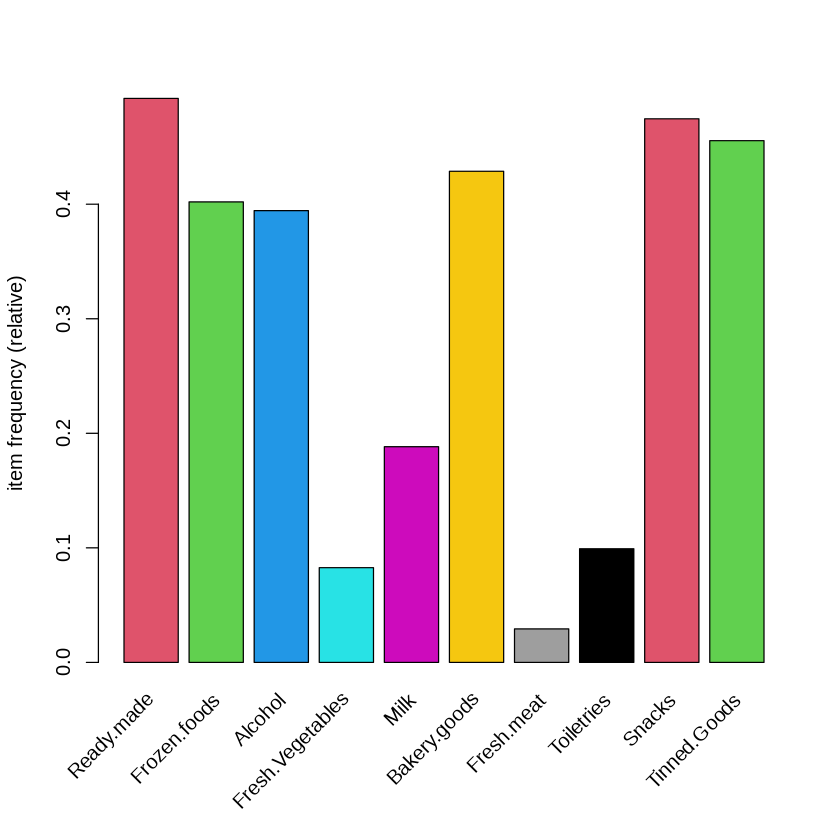

In [ ]:
itemFrequencyPlot(shopping05T, col = 2:12)

In [ ]:
itemFrequency(shopping05T[ , c(2,5)])

Frozen.foods         Milk 
   0.4020356    0.1882952

In [ ]:
itemFrequency(shopping05T[ , 6])

Bakery.goods 
   0.4287532

In [ ]:
0.4287532 * 786  # = [1] 337

[1] 337

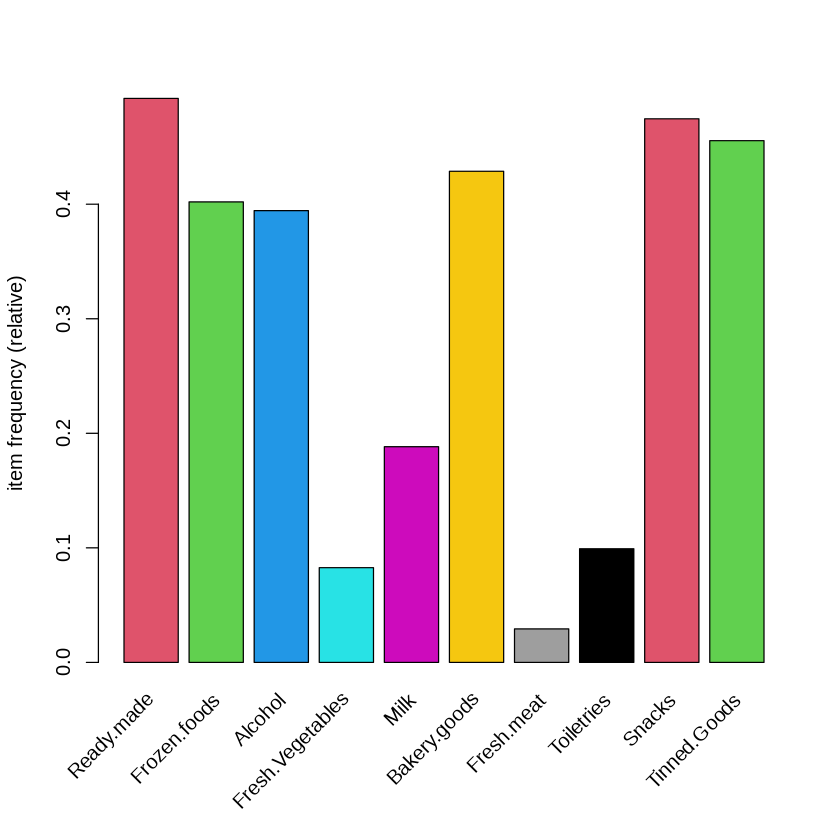

In [ ]:
itemFrequencyPlot(shopping05T[ , 1:10], col= 2:11)

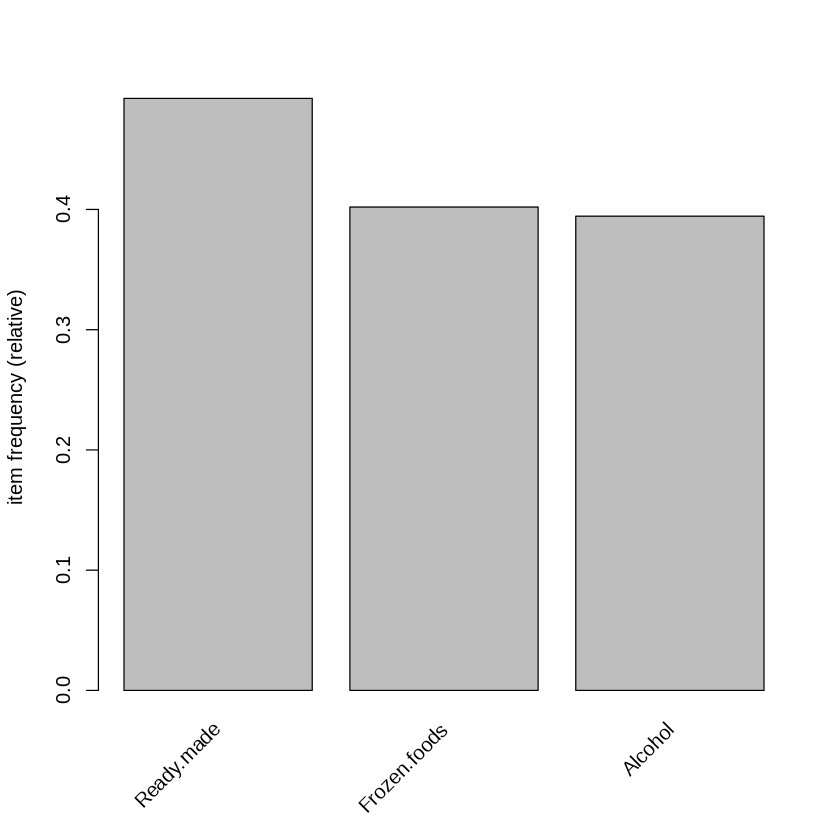

In [ ]:
itemFrequencyPlot(shopping05T[ , 1:3])

# 8.可設定特定目標的關聯規則:
- 如以下設定後項為Alcohol。
- 或者降低信賴度從80%至75%，則可產生17個較多的關聯規則，提供我們參考顧客購買物品的關聯性。

In [ ]:
rule05a = apriori(shopping05T,parameter=list(supp=0.09, conf=0.75,maxlen=5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 70 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 786 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(shopping05T, parameter = list(supp = 0.09, conf = 0.75, :
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”


 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(rule05a)

     lhs                rhs               support confidence  coverage     lift count
[1]  {Alcohol,                                                                       
      Milk}          => {Bakery.goods} 0.09033079  0.7888889 0.1145038 1.839960    71
[2]  {Frozen.foods,                                                                  
      Milk}          => {Bakery.goods} 0.09033079  0.8352941 0.1081425 1.948193    71
[3]  {Milk,                                                                          
      Tinned.Goods}  => {Bakery.goods} 0.10050891  0.7900000 0.1272265 1.842552    79
[4]  {Milk,                                                                          
      Snacks}        => {Bakery.goods} 0.09669211  0.7755102 0.1246819 1.808757    76
[5]  {Milk,                                                                          
      Bakery.goods}  => {Ready.made}   0.10559796  0.7545455 0.1399491 1.532488    83
[6]  {Ready.made,                                     

# 9.關聯規則視覺化-----
- 最後我們要做的事是將先前4, 17個關聯規則視覺化，包括繪製Heat map(熱圖)、Balloon plot (氣球圖)、Graph (網路圖) 、平行座標圖(Parallel coordinates plot)，程式碼如下：

In [ ]:
library(arulesViz)

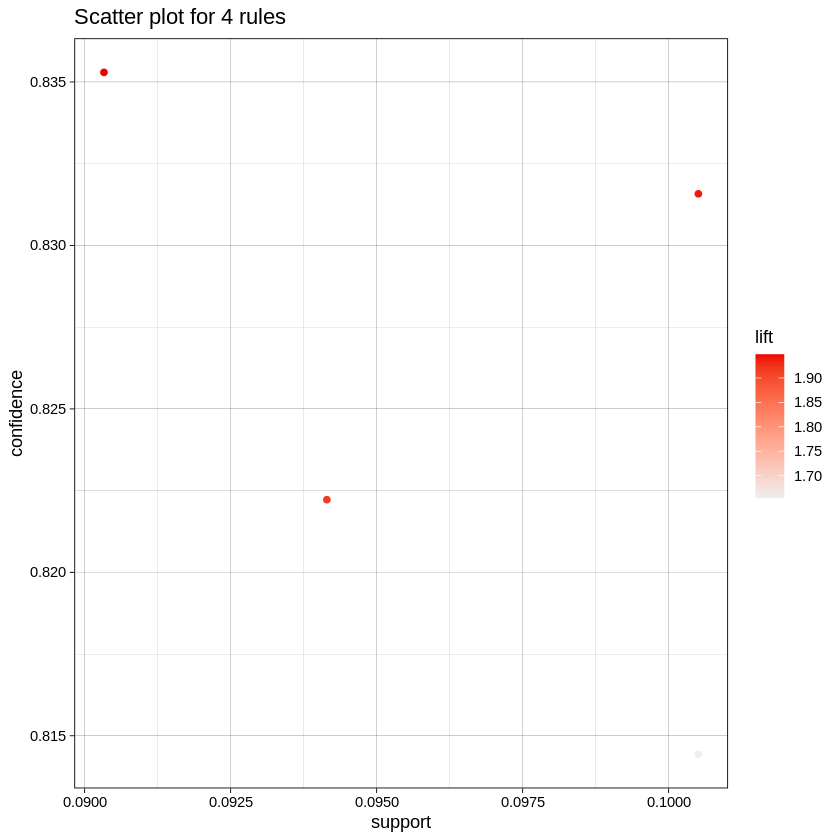

In [ ]:
#Heat map(熱圖)
plot(rule05)

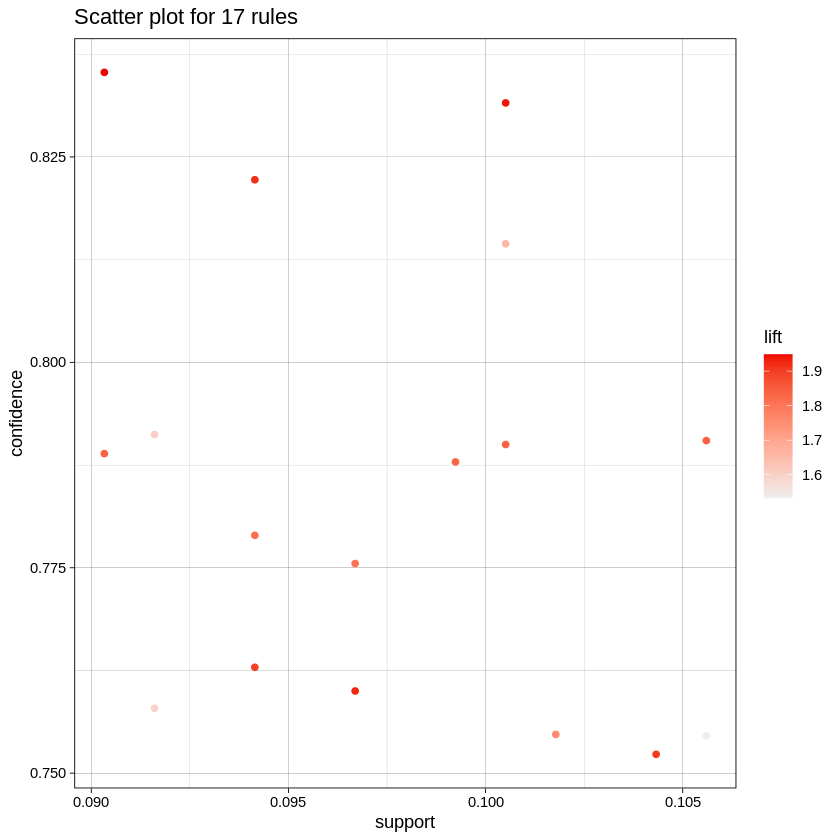

In [ ]:
plot(rule05a)

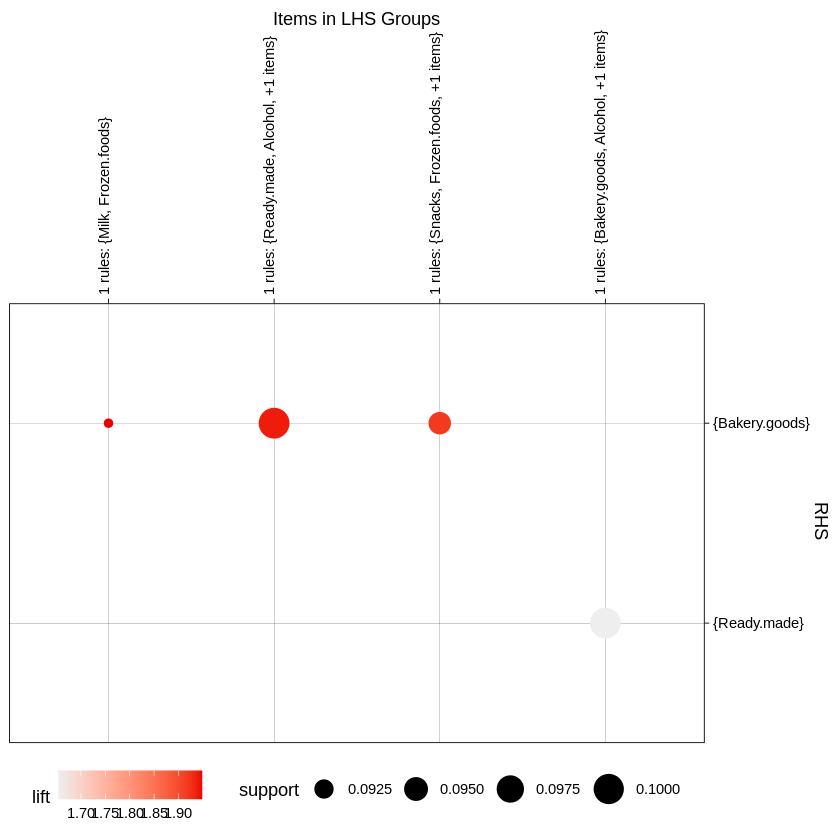

In [ ]:
#Balloon plot (氣球圖)
plot(rule05,method="grouped") 
#plot(rule05a,method="grouped")  

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


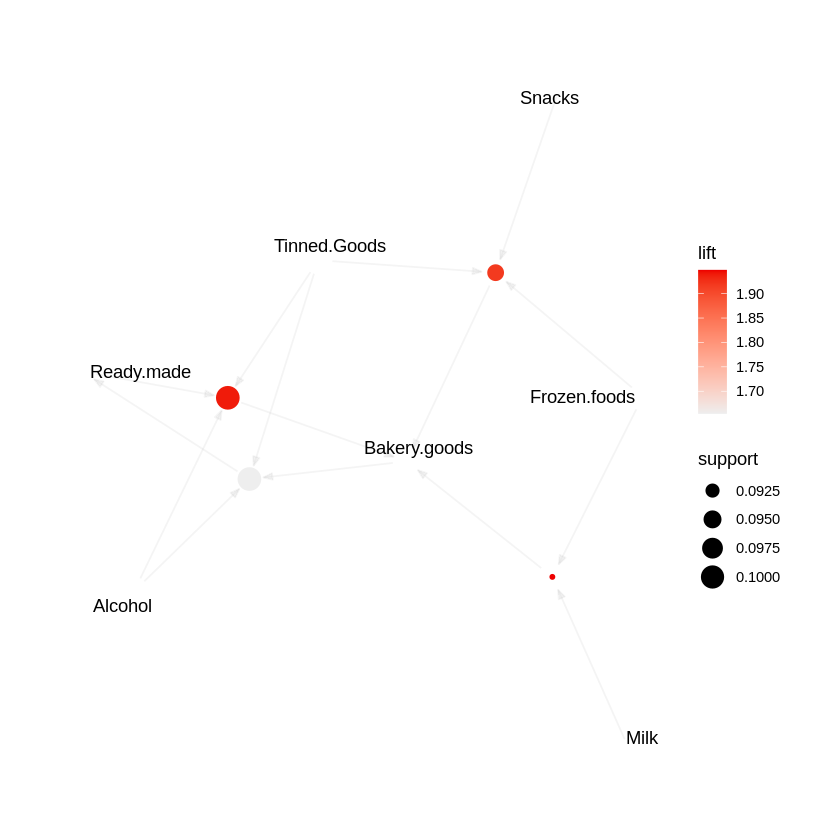

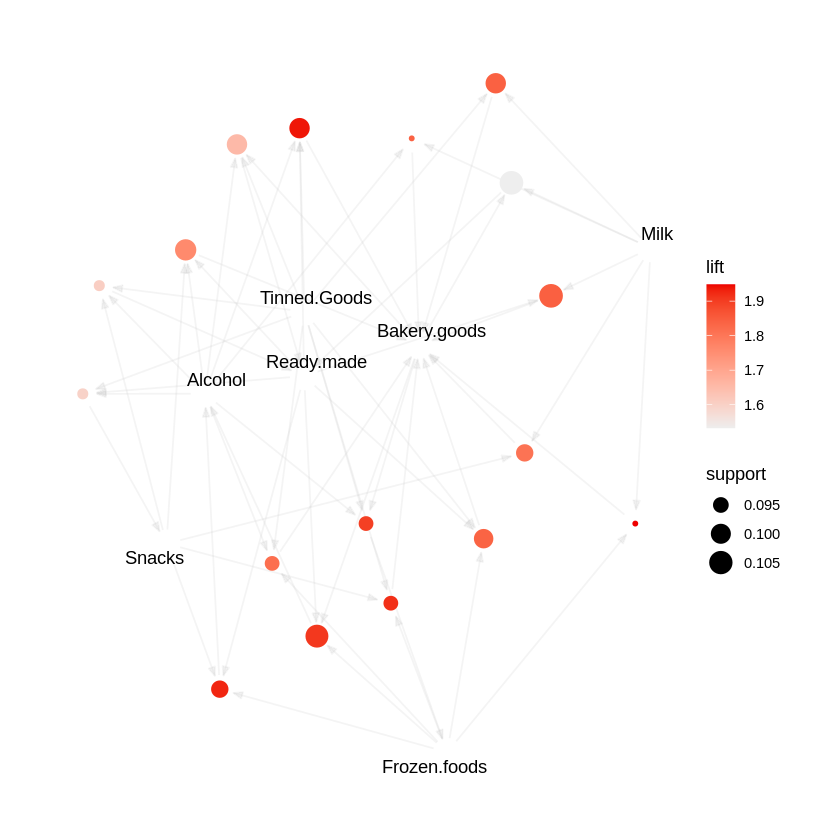

In [ ]:
# Graph (網路圖)
plot(rule05,method="graph",control =list(type="items"))
plot(rule05a,method="graph",control =list(type="items"))

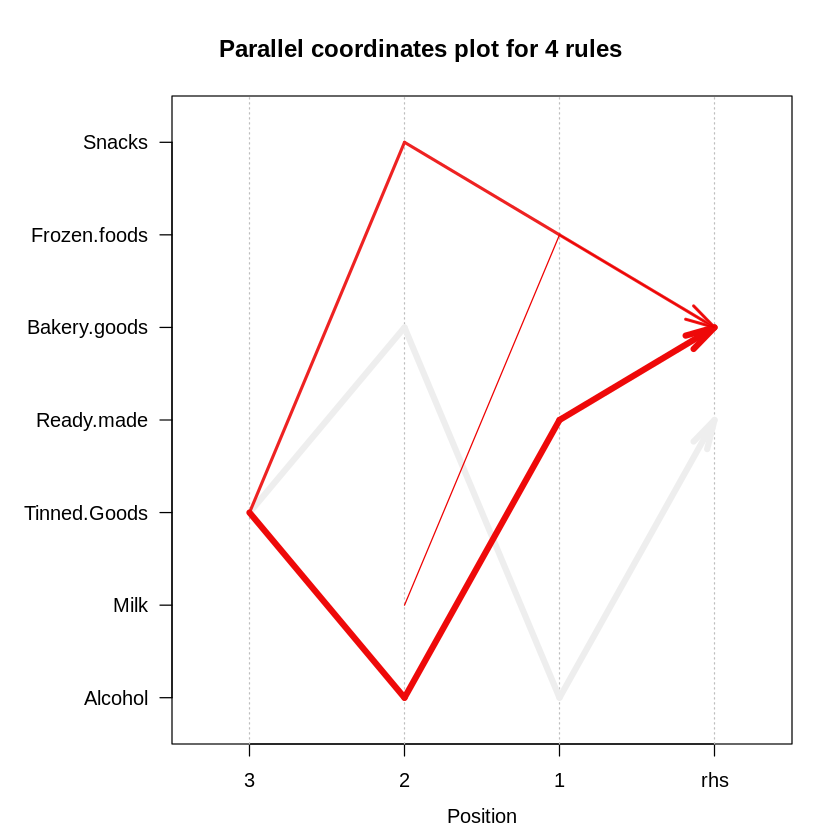

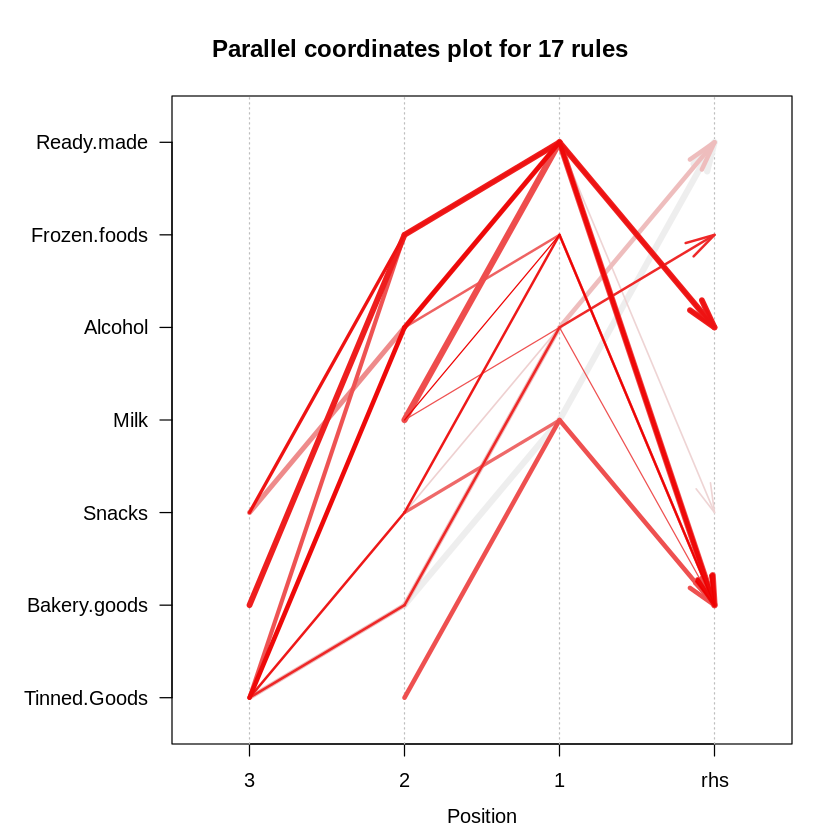

In [ ]:
# Parallel coordinates plot (平行座標圖)
plot(rule05, method = "paracoord", control = list(reorder = TRUE))
plot(rule05a, method = "paracoord", control = list(reorder = TRUE))

# 10.Association Mining (Market Basket Analysis)

In [ ]:
# Association Mining (Market Basket Analysis)
# # http://r-statistics.co/Association-Mining-With-R.html
# Association mining is commonly used to make product recommendations by identifying products that are frequently bought together. 
# But, if you are not careful, the rules can give misleading results in certain cases.
# 
# Association mining is usually done on transactions data from a retail market or from an online e-commerce store. 
# Since most transactions data is large, the apriori algorithm makes it easier to find these patterns or rules quickly.
# 
# So, What is a rule? ------
#   
#   A rule is a notation that represents which item/s is frequently bought with what item/s. 
# It has an LHS and an RHS part and can be represented as follows:

#   itemset A => itemset B
# 
# This means, the item/s on the right were frequently purchased along with items on the left.
# 
### How to measure the strength of a rule?

#   The apriori() generates the most relevent set of rules from a given transaction data. 
# It also shows the support, confidence and lift of those rules. 
# These three measure can be used to decide the relative strength of the rules. 

### So what do these terms mean? ------
#   
#   Lets consider the rule A => B in order to compute these metrics.
# 
# 
# Support = (Number of transactions with both A and B) / Total number of transactions = P(A∩B)
# 
# 
# 
# Confidence = (Number of transactions with both A and B) / Total number of transactions with A = P(A∩B) / P(A)
# 
# 
# 
# ExpectedConfidence = Number of transactions with B / Total number of transactions = P(B)
# 
# 
# 
# Lift = Confidence / Expected Confidence = P(A∩B) / P(A).P(B)
# 
# 
# Lift is the factor by which, the co-occurence of A and B exceeds the expected probability of A and B co-occuring, 
# had they been independent. 
### So, higher the lift, higher the chance of A and B occurring together.
# 
# Lets see how to get the rules, confidence, lift etc using the arules package in R.

### Example ------
# Transactions data
# Lets play with the Groceries data that comes with the arules pkg. 
# Unlike dataframe, using head(Groceries) does not display the transaction items in the data. 
# To view the transactions, use the inspect() function instead.
# 
# Since association mining deals with transactions, the data has to be converted to one of class transactions, 
# made available in R through the arules pkg. 
# This is a necessary step because the apriori() function accepts transactions data of class transactions only.

In [ ]:
#install.packages("arules")
library(arules)

In [ ]:
data(Groceries)

In [ ]:
?Groceries

# The ‘Groceries’ data set contains 1 month (30 days) of real-world
# point-of-sale transaction data from a typical local grocery
# outlet.  The data set contains 9835 transactions and the items are
# aggregated to 169 categories.


In [ ]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [ ]:
head(Groceries) # does not display the transaction items in the data.
# transactions in sparse format with
# 6 transactions (rows) and
# 169 items (columns)

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

In [ ]:
class(Groceries)
# [1] "transactions"
# attr(,"package")
# [1] "arules"

[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
inspect(Groceries)

In [ ]:
inspect(head(Groceries, 3))

    items                 
[1] {citrus fruit,        
     semi-finished bread, 
     margarine,           
     ready soups}         
[2] {tropical fruit,      
     yogurt,              
     coffee}              
[3] {whole milk}          


In [ ]:
inspect(tail(Groceries))

    items                 
[1] {tropical fruit,      
     other vegetables,    
     domestic eggs,       
     zwieback,            
     ketchup,             
     soda,                
     dishes}              
[2] {sausage,             
     chicken,             
     beef,                
     hamburger meat,      
     citrus fruit,        
     grapes,              
     root vegetables,     
     whole milk,          
     butter,              
     whipped/sour cream,  
     flour,               
     coffee,              
     red/blush wine,      
     salty snack,         
     chocolate,           
     hygiene articles,    
     napkins}             
[3] {cooking chocolate}   
[4] {chicken,             
     citrus fruit,        
     other vegetables,    
     butter,              
     yogurt,              
     frozen dessert,      
     domestic eggs,       
     rolls/buns,          
     rum,                 
     cling film/bags}     
[5] {semi-finished bread, 
 

In [ ]:
# If you have to read data from a file as a transactions data, use read.transactions(). -----

# tdata <- read.transactions("transactions_data.txt", sep="\t")
# If you already have your transactions stored as a dataframe, you could convert it to class transactions as follows,

# tData <- as (myDataFrame, "transactions") # convert to 'transactions' class

# Here are couple more utility functions that are good to know: -----

In [ ]:
dim(Groceries)

[1] 9835  169

In [ ]:
size(Groceries)

[1]  4  3  1  4  4  5  1  5  1  2  5  9  1  3  2  4  1  1  1  1  1  2  1  5
  [25] 11  2  1  4  1  6  4  7  5  8  3  2  1  1  4  3  6 13  2  1  8  1  2  1
  [49]  1 10  4  1  4 10  5  4  3  7  6  3  7  2  3  5  3  1  2  2  3  8  1  7
  [73]  8  3  1  4  5  5  4  2  1 10  4  7  1  7  2  3  2  1  1  3  4  9  1  2
  [97]  9 10  3  2  2  9  3 10  1  2  6  7  1  2 10  2  8  2  4  3  6  7  3  8
 [121]  4  4  2  2  1 15  1  1  3  1  2  5  1  2  3  3  1  2  1  1  5  3  2  1
 [145]  7  2 10  5  6  2  6  7  1  6  9  2  1  5  5  5  4  3  3  1  4  2  3  3
 [169]  3  1  8  1  5  1  8  4  2  2  3  5  3  2  2  4  2 23  2  7  6  1  1  1
 [193]  5  2  1  7  1  5  5  3  1  1  2  1  3  2  5  2  1  3  6  4  5  4  6  1
 [217]  2  2  1  2  4  1 12  2  1  6  4  8  3  1  6 12  3  8  9  4  5  6  4 16
 [241]  7  8  3  4 11  4  4  5  6  2  2  9  1  1  3  3  1  1 11  4  6  1  1  1
 [265]  2  1  7 12  1  1  6  5  3  8 11 11 11  7  8  1  4 10  1  2  6  5  1  3
 [289]  1  5  1  9  9  7  6  4  2  1  1  4  2 13  1  1  5  5  2  5  9  1  5  6
 [313]  1  3  4  2  3  1  7  2  3  3  2  1  5 11  2  5  9  3  5  2  1  1  1  4
 [337]  8  1  1  8  4  2  3  1  8  3  1  3  6  4  3  5  1  3  5  2  1  1  2  2
 [361]  1  4  2  8  5  7 10  5  7  1  2  2  2  4  2  8  4  4  1  2  1  1  2 11
 [385]  7  7  3  4  1  4  1  1  6  1  1  3  2  4  1  4  4  2 10  4  2  4  1  1
 [409]  2  1  1  6  5  7  4  7  6  6  5  2  6  2  1  1  1  4  1  4  8  4  2  2
 [433]  3  1  2  1  4  3  6  4 11  7  7  1  2  3  9  6  5  5  4  4  7  8  3  8
 [457]  2  2  1  1  1  2  2  3  5 10  3  5  3  3  2  2  8  1  4  5  3  1  4  1
 [481]  2 14  2 11  1  3  6  2  4  3  3  1  4  3  3  2  2  3  4  2  2  3  3  3
 [505]  6 10  2  2  5  2  3  8  1  4  1  1  1 17  2  3  1  2  7  5  2  2  1  7
 [529]  2  4  1  1  1  6  2  4  3  9  4  2  1  2 11  1  3  7  1  5  1  2  2  1
 [553]  2  1  4  1  1  8  1  5  3  6  1  8  2  1  2  5  4  6  1  8  6  1  2  1
 [577]  1  1  3  4  1  5  5  5  2  6  2 13  2  3  1  3  2  2  3 11  5  9  2  3
 [601]  1  1  1  3  9  1  5  6 10  1  1  8  1  9  8  7  5  1  2  4  6  9  7  2
 [625] 10 11  3  4  5 11 10  9  3 12  2  7  3  8  1  1  2  9  5 10  6  1  4  1
 [649]  6 10  2  1  1  2  2  3  1  3  8  3  7  6  4  6  1  4  3  3  5  4  1  1
 [673] 11  3  9  4  3  7 11  5  5  5  2  3  8  3  1  2  1  5  5  1  4  4  7  5
 [697]  7  7  5  4  5  2  3  4  4  1  7  5  8  8  7  5  2  1  2  2  2  1  2  1
 [721]  2  1  7  2  1  5  5  4  4  3  6  7  6 10  3  1  3  4  1  6  5  6  3  4
 [745]  4  1  3  1  2  2  3  3  5  1  3  1  1  1  4  6 14  7  9  2  6  2  3  1
 [769]  4  2  5  8  9  3  3  5  6  4  1  3  3 17  8  4  2  1  6  3  2  4  1  9
 [793]  5  2 13 11 13  4  1  2  4  8  1  8  5  5  2  1  6  5  9  2  1  5  2  1
 [817]  9  8  5  5 11  5  9 12  3  6  1  9  3  7  2  6 10  2  1  2  1  1  1  4
 [841]  4  2  7 12  8  6  2  2 10  8 11  1 11  7 13  7  2  1  5 12 15 14  2  1
 [865] 12  4  4  8  7  2  4  8  3 12  4  1  2  2  3  2  2  5  3  9  1  6  2  7
 [889]  7  3  3  1  6  9  2  2  3  5  5  3  2  4  7  3 14  3  1  8  1  8  2  3
 [913]  7  5  2  6 15  8  6  3  8  7  2  8  2  2  2  6  1  5 15  8  2  1  2  2
 [937]  8  5  2  2  3  3  4  1  1  4  3  7 19  8  2  3  3  2  1  2  6  3  8  5
 [961]  3 10  3  1  1  3  8  5  4  4  9  5  1  5  9  4  3  1  3 17 20  3  7  6
 [985]  4  2  4  9  6 16 16  1  3 11  2  3 23  1  5 10  4 10  5 10  6  2  2  3
[1009]  4  1  4 18  7 12  2  2 13  1  5  2  1  5  2  4  4  1  8  2  1  5  4  4
[1033]  2 13  8  5  3  1  2  6  1  7  4  1  5 10 15  1  1  6 10  2  9  3  1  3
[1057] 14  4  5  1  3  2  2 14  1 11  6 13  5  8  1  1 14  7 10  1  8  6  1  2
[1081]  3 15 11 21 18  6  6  3  3 11  4 26  7  3  1 13  1  4  8  1  5 11  9  7
[1105] 11  8  2  2  6 10  7  2  6  7 16  1  2  1  1  4  3 17  9  7  1  5  6  5
[1129]  1  4  6  2  5  5  4  1  1  4  1  2  1  6  7 10  7  7  1 15  9 11  2  5
[1153]  2  4  1  8  9  1  4  1  2  4  1  1  4  2  4  5 11  9 14  6  3  5  6  1
[1177]  2  3  4  5  3  1 10  3  7  2  5  8  6 10  1  1  2  3  3  2  2 15  6  2
[1201]  9 12  1  4  5  5  6  5  5  3  6 16  5  4  1  

In [ ]:
size(head(Groceries)) # number of items in each observation
#[1] 4 3 1 4 4 5

[1] 4 3 1 4 4 5

In [ ]:
LIST(head(Groceries, 3)) # convert 'transactions' to a list, note the LIST in CAPS
#> [[1]]
#> [1] "citrus fruit"        "semi-finished bread" "margarine"          
#> [4] "ready soups"        
#> 
#> [[2]]
#> [1] "tropical fruit" "yogurt"         "coffee"        
#> 
#> [[3]]
#> [1] "whole milk"

[[1]]
[1] "citrus fruit"        "semi-finished bread" "margarine"          
[4] "ready soups"        

[[2]]
[1] "tropical fruit" "yogurt"         "coffee"        

[[3]]
[1] "whole milk"

# 11.How to see the most frequent items? ------
- The eclat() takes in a transactions object and gives the most frequent items in the data based the support you provide to the supp argument. 
- The maxlen defines the maximum number of items in each itemset of frequent items.


In [ ]:
?eclat

In [ ]:
frequentItems <- eclat(Groceries, parameter = list(supp = 0.07, maxlen = 15)) # calculates support for frequent items

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.07      1     15 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 688 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [18 item(s)] done [0.00s].
creating sparse bit matrix ... [18 row(s), 9835 column(s)] done [0.00s].
writing  ... [19 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].


In [ ]:
inspect(frequentItems)
#      items                         support    count
# [1]  {other vegetables,whole milk} 0.07483477  736 
# [2]  {whole milk}                  0.25551601 2513 
# [3]  {other vegetables}            0.19349263 1903 
# [4]  {rolls/buns}                  0.18393493 1809 
# [5]  {yogurt}                      0.13950178 1372 
# [6]  {soda}                        0.17437722 1715 
# [7]  {root vegetables}             0.10899847 1072 
# [8]  {tropical fruit}              0.10493137 1032 
# [9]  {bottled water}               0.11052364 1087 
# [10] {sausage}                     0.09395018  924 
# [11] {shopping bags}               0.09852567  969 
# [12] {citrus fruit}                0.08276563  814 
# [13] {pastry}                      0.08896797  875 
# [14] {pip fruit}                   0.07564820  744 
# [15] {whipped/sour cream}          0.07168277  705 
# [16] {fruit/vegetable juice}       0.07229283  711 
# [17] {newspapers}                  0.07981698  785 
# [18] {bottled beer}                0.08052872  792 
# [19] {canned beer}                 0.07768175  764 

     items                          support    count
[1]  {other vegetables, whole milk} 0.07483477  736 
[2]  {whole milk}                   0.25551601 2513 
[3]  {other vegetables}             0.19349263 1903 
[4]  {rolls/buns}                   0.18393493 1809 
[5]  {yogurt}                       0.13950178 1372 
[6]  {soda}                         0.17437722 1715 
[7]  {root vegetables}              0.10899847 1072 
[8]  {tropical fruit}               0.10493137 1032 
[9]  {bottled water}                0.11052364 1087 
[10] {sausage}                      0.09395018  924 
[11] {shopping bags}                0.09852567  969 
[12] {citrus fruit}                 0.08276563  814 
[13] {pastry}                       0.08896797  875 
[14] {pip fruit}                    0.07564820  744 
[15] {whipped/sour cream}           0.07168277  705 
[16] {fruit/vegetable juice}        0.07229283  711 
[17] {newspapers}                   0.07981698  785 
[18] {bottled beer}                 0.08052872

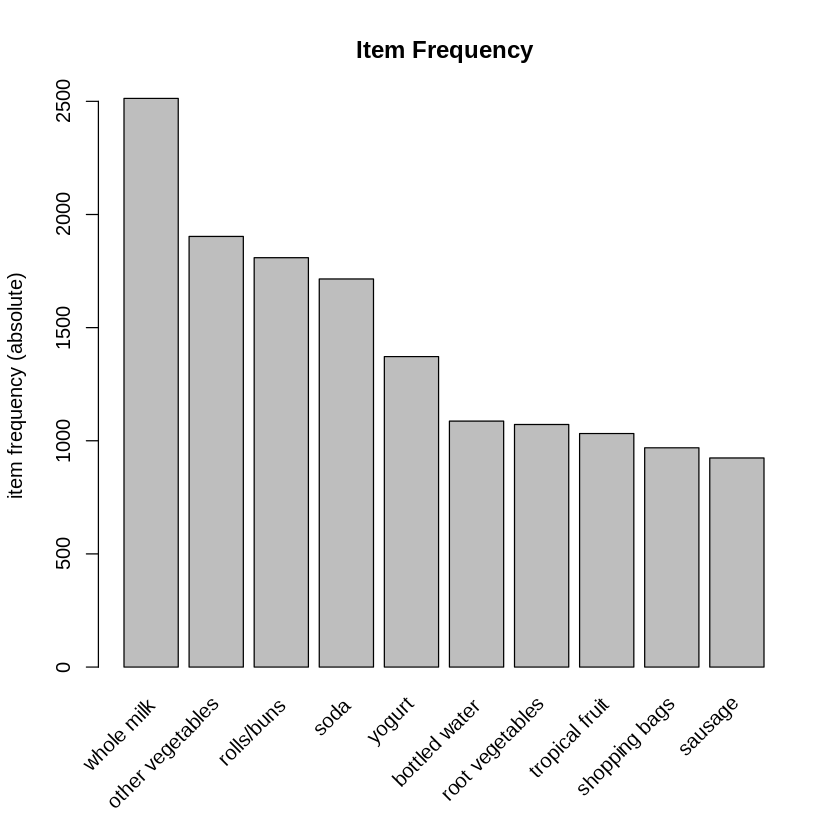

In [ ]:
itemFrequencyPlot(Groceries, topN=10, type="absolute", main="Item Frequency") # plot frequent items

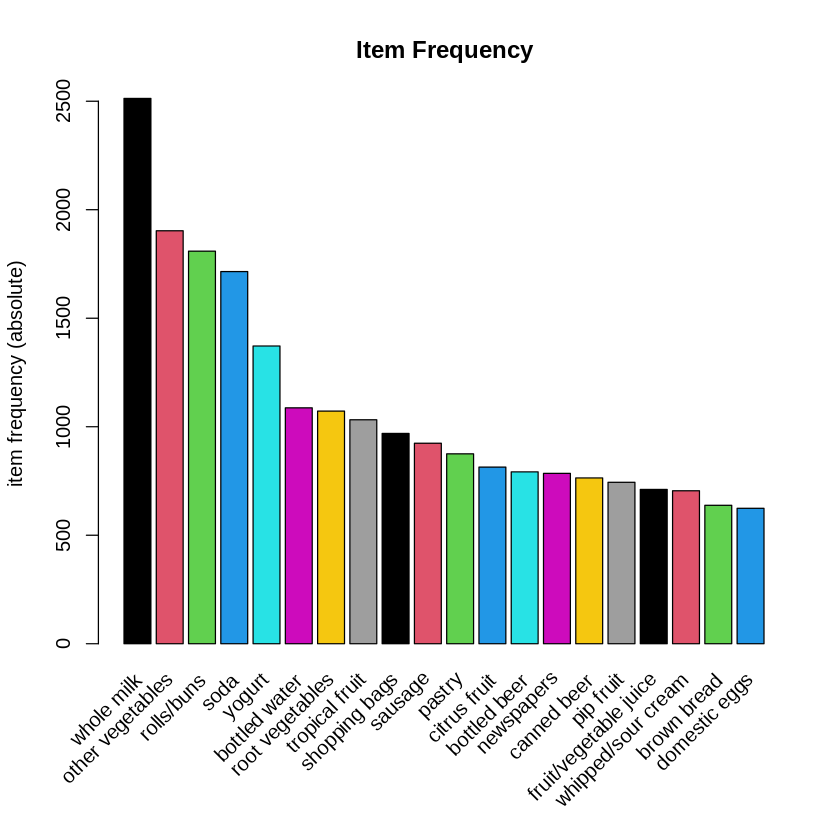

In [ ]:
itemFrequencyPlot(Groceries, topN=20, type="absolute", main="Item Frequency", col = 1:20) # plot frequent items

# 12.How to get the product recommendation rules? ------
?apriori
- Mining Associations with Apriori
- Description
- Mine frequent itemsets, association rules or association hyperedges using the Apriori algorithm. The Apriori algorithm employs level-wise search for frequent itemsets. The implementation of Apriori used includes some improvements (e.g., a prefix tree and item sorting).
- Usage
- apriori(data, parameter = NULL, appearance = NULL, control = NULL)

In [ ]:
rules <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.5)) # Min Support as 0.001, confidence as 0.8.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [5668 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rules08 <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.8)) # Min Support as 0.001, confidence as 0.8.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [410 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rules09 <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.9)) # Min Support as 0.001, confidence as 0.8.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [129 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rules95 <- apriori(Groceries, parameter = list(supp = 0.001, conf = 0.95)) # writing ... [28 rule(s)] done [0.00s].

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [28 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
rules_conf <- sort(rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
rules_conf
# set of 5668 rules 

set of 5668 rules 

In [ ]:
inspect(head(rules_conf, 10)) # show the support, lift and confidence for all rules

     lhs                      rhs                    support confidence    coverage     lift count
[1]  {rice,                                                                                       
      sugar}               => {whole milk}       0.001220132          1 0.001220132 3.913649    12
[2]  {canned fish,                                                                                
      hygiene articles}    => {whole milk}       0.001118454          1 0.001118454 3.913649    11
[3]  {root vegetables,                                                                            
      butter,                                                                                     
      rice}                => {whole milk}       0.001016777          1 0.001016777 3.913649    10
[4]  {root vegetables,                                                                            
      whipped/sour cream,                                                                         
      flou

In [ ]:
rules_lift <- sort (rules, by="lift", decreasing=TRUE) # 'high-lift' rules.

In [ ]:
inspect(head(rules_lift, 10)) # show the support, lift and confidence for all rules

     lhs                         rhs                  support confidence    coverage     lift count
[1]  {Instant food products,                                                                       
      soda}                   => {hamburger meat} 0.001220132  0.6315789 0.001931876 18.99565    12
[2]  {soda,                                                                                        
      popcorn}                => {salty snack}    0.001220132  0.6315789 0.001931876 16.69779    12
[3]  {flour,                                                                                       
      baking powder}          => {sugar}          0.001016777  0.5555556 0.001830198 16.40807    10
[4]  {ham,                                                                                         
      processed cheese}       => {white bread}    0.001931876  0.6333333 0.003050330 15.04549    19
[5]  {whole milk,                                                                                  


In [ ]:
# The rules with confidence of 1 (see rules_conf above) imply that, whenever the LHS item was purchased, 
# the RHS item was also purchased 100% of the time.

# A rule with a lift of 18 (see rules_lift above) imply that, the items in LHS and RHS are 18 times more likely to 
# be purchased together compared to the purchases when they are assumed to be unrelated.

# 13.How To Control The Number Of Rules in Output ? ----
- Adjust the maxlen, supp and conf arguments in the apriori function to control the number of rules generated. 
- You will have to adjust this based on the sparesness of you data.

In [ ]:
rules02 <- apriori(Groceries, parameter = list (supp = 0.001, conf = 0.5, maxlen=3)) # maxlen = 3 limits the elements in a rule to 3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(Groceries, parameter = list(supp = 0.001, conf = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
writing ... [1472 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
# To get ‘strong‘ rules, increase the value of ‘conf’ parameter.
# To get ‘longer‘ rules, increase ‘maxlen’.

# 14.How To Remove Redundant Rules ? ----
- Sometimes it is desirable to remove the rules that are subset of larger rules. 
- To do so, use the below code to filter the redundant rules.

In [ ]:
subsetRules <- which(colSums(is.subset(rules, rules)) > 1) # get subset rules in vector

In [ ]:
length(subsetRules)  #> 3913

[1] 3913

In [ ]:
rules <- rules[-subsetRules] # remove subset rules. 

# 15.How to Find Rules Related To Given Item/s ?----
- This can be achieved by modifying the appearance parameter in the apriori() function. For example,

- To find what factors influenced purchase of product X
- To find out what customers had purchased before buying ‘Whole Milk’. This will help you understand the patterns that led to the purchase of ‘whole milk’.

In [ ]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.08), 
           appearance = list (default="lhs",rhs="whole milk"), 
           control = list (verbose=F)) # get rules that lead to buying 'whole milk'

In [ ]:
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.

In [ ]:
inspect(head(rules_conf))

    lhs                      rhs              support confidence    coverage     lift count
[1] {rice,                                                                                 
     sugar}               => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                          
     hygiene articles}    => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                      
     butter,                                                                               
     rice}                => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                      
     whipped/sour cream,                                                                   
     flour}               => {whole milk} 0.001728521          1 0.001728521 3.9

In [ ]:
# To find out what products were purchased after/along with product X
# The is a case to find out the Customers who bought ‘Whole Milk’ also bought . . 
# In the equation, ‘whole milk’ is in LHS (left hand side).

In [ ]:
rules <- apriori (data=Groceries, parameter=list (supp=0.001,conf = 0.15,minlen=2), 
             appearance = list(default="rhs",lhs="whole milk"), 
             control = list (verbose=F)) # those who bought 'milk' also bought..

In [ ]:
rules_conf <- sort (rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.

In [ ]:
inspect(head(rules_conf))

    lhs             rhs                support    confidence coverage lift     
[1] {whole milk} => {other vegetables} 0.07483477 0.2928770  0.255516 1.5136341
[2] {whole milk} => {rolls/buns}       0.05663447 0.2216474  0.255516 1.2050318
[3] {whole milk} => {yogurt}           0.05602440 0.2192598  0.255516 1.5717351
[4] {whole milk} => {root vegetables}  0.04890696 0.1914047  0.255516 1.7560310
[5] {whole milk} => {tropical fruit}   0.04229792 0.1655392  0.255516 1.5775950
[6] {whole milk} => {soda}             0.04006101 0.1567847  0.255516 0.8991124
    count
[1] 736  
[2] 557  
[3] 551  
[4] 481  
[5] 416  
[6] 394  


In [ ]:
# One drawback with this is, you will get only 1 item on the RHS, 
# irrespective of the support, confidence or minlen parameters.

In [ ]:
# Caveat with using Lift
# The directionality of the rule is lost when lift is used. 
# That is, the lift of any rule, A => B and the rule B => A will be the same. 
# See the calculation below:
  
#   A -> B
# Support: P(A∩B)
# 
# Confidence: P(A∩B)P(A)
# 
# Expected Confidence: P(B)
# 
# Lift: ConfidenceExpected Confidence = P(A∩B)P(A).P(B)
# 
# B -> A
# Support: P(A∩B)

# Confidence: P(A∩B)P(B)
# 
# Expected Confidence: P(B)
# 
# Lift: ConfidenceExpected Confidence = P(A∩B)P(A).P(B)
# 
# Important Note
# For both rules A -> B and B -> A, the value of lift and support turns out to be the same. 
# This means we cannot use lift to make recommendation for a particular directional ‘rule’. 
# It can merely be used to club frequently bought items into groups.

# Caveat with using Confidence
# The confidence of a rule can be a misleading measure while making product recommendations 
# in real world problems, especially while making add-ons product recommendations. 
# Lets consider the following data with 4 transactions, involving IPhones and Headsets:
#   
# Iphone, Headset
# Iphone, Headset
# Iphone
# Iphone
# We can create 2 rules for these transactions as shown below:
  
# Iphone -> Headset
# Headset -> IPhone
# In real world, it would be realistic to recommend headphones to a person who 
# just bought an iPhone and not the other way around. Imagine being recommended 
# an iPhone when you just finished purchasing a pair of headphones. Not nice!.

# While selecting rules from the apriori output, you might guess that higher the confidence 
# a rule has, better is the rule. But for cases like this, the headset -> iPhone 
# rule will have a higher confidence (2 times) over iPhone -> headset. Can you see why? The calculation below show how.
# 
# Confidence Calculation:
#   iPhone -> Headset: P(iPhone ∩ Headset)P(iPhone) = 0.5 / 1 = 0.5
# 
# Headset -> iPhone: P(iPhone ∩ Headset)P(Headset) = 0.5 / 0.5 = 1.0

# As, you can see, the headset -> iPhone recommendation has a higher confidence, 
# which is misleading and unrealistic. So, confidence should not be the only measure 
# you should use to make product recommendations.
# 
# So, you probably need to check more criteria such as the price of products, 
# product types etc before recommending items, especially in cross selling cases.

# 16.# Example: Identifying Frequently-Purchased Groceries —-

In [ ]:
# Association analysis on the groceries data
# Example: Identifying Frequently-Purchased Groceries —-
#   Step 1: Collecting Data
# Our market basket analysis will utilize the purchase data collected from one month 
# of operation at a real-world grocery store. The data contains 9,835 transactions or 
# about 327 transactions per day (roughly 30 transactions per hour in a 12-hour business day), 
# suggesting that the retailer is not particularly large, nor is it particularly small. 
# The dataset used here was adapted from the Groceries dataset in the arules R package.
# 
# Step 2: Exploring and preparing the data
# load the grocery data into a sparse matrix

https://www.kaggle.com/datasets/irfanasrullah/groceries

In [ ]:
library(arules)

groceries <- read.transactions("/content/sample_data/groceries.csv", sep = ",")
summary(groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [ ]:
# look at the first five transactions
inspect(groceries[1:5])

    items                      
[1] {citrus fruit,             
     margarine,                
     ready soups,              
     semi-finished bread}      
[2] {coffee,                   
     tropical fruit,           
     yogurt}                   
[3] {whole milk}               
[4] {cream cheese,             
     meat spreads,             
     pip fruit,                
     yogurt}                   
[5] {condensed milk,           
     long life bakery product, 
     other vegetables,         
     whole milk}               


In [ ]:
#examine the frequency of items
itemFrequency(groceries[, 1:3])

abrasive cleaner artif. sweetener   baby cosmetics 
    0.0035587189     0.0032536858     0.0006100661

In [ ]:
itemFrequency(groceries)

abrasive cleaner          artif. sweetener            baby cosmetics 
             0.0035587189              0.0032536858              0.0006100661 
                baby food                      bags             baking powder 
             0.0001016777              0.0004067107              0.0176919166 
         bathroom cleaner                      beef                   berries 
             0.0027452974              0.0524656838              0.0332486019 
                beverages              bottled beer             bottled water 
             0.0260294865              0.0805287239              0.1105236401 
                   brandy               brown bread                    butter 
             0.0041687850              0.0648703610              0.0554143366 
              butter milk                  cake bar                   candles 
             0.0279613625              0.0132180986              0.0089476360 
                    candy               canned beer               canned fish 
             0.0298932384              0.0776817489              0.0150482969 
             canned fruit         canned vegetables                  cat food 
             0.0032536858              0.0107778343              0.0232841891 
                  cereals               chewing gum                   chicken 
             0.0056939502              0.0210472801              0.0429079817 
                chocolate     chocolate marshmallow              citrus fruit 
             0.0496187087              0.0090493137              0.0827656329 
                  cleaner           cling film/bags              cocoa drinks 
             0.0050838841              0.0113879004              0.0022369090 
                   coffee            condensed milk         cooking chocolate 
             0.0580579563              0.0102694459              0.0025419420 
                 cookware                     cream              cream cheese 
             0.0027452974              0.0013218099              0.0396542959 
                     curd               curd cheese               decalcifier 
             0.0532791052              0.0050838841              0.0015251652 
              dental care                   dessert                 detergent 
             0.0057956279              0.0371123538              0.0192170819 
             dish cleaner                    dishes                  dog food 
             0.0104728012              0.0175902389              0.0085409253 
            domestic eggs  female sanitary products         finished products 
             0.0634468734              0.0061006609              0.0065073716 
                     fish                     flour            flower (seeds) 
             0.0029486528              0.0173868836              0.0103711235 
   flower soil/fertilizer               frankfurter            frozen chicken 
             0.0019318760              0.0589730554              0.0006100661 
           frozen dessert               frozen fish             frozen fruits 
             0.0107778343              0.0116929334              0.0012201322 
             frozen meals    frozen potato products         frozen vegetables 
             0.0283680732              0.0084392476              0.0480935435 
    fruit/vegetable juice                    grapes                hair spray 
             0.0722928317              0.0223690900              0.0011184545 
                      ham            hamburger meat               hard cheese 
             0.0260294865              0.0332486019              0.0245043213 
                    herbs                     honey    house keeping products 
             0.0162684291              0.0015251652              0.0083375699 
         hygiene articles                 ice cream            instant coffee 
             0.0329435689              0.0250127097              0.0074224708 
    Instant food products                       jam        

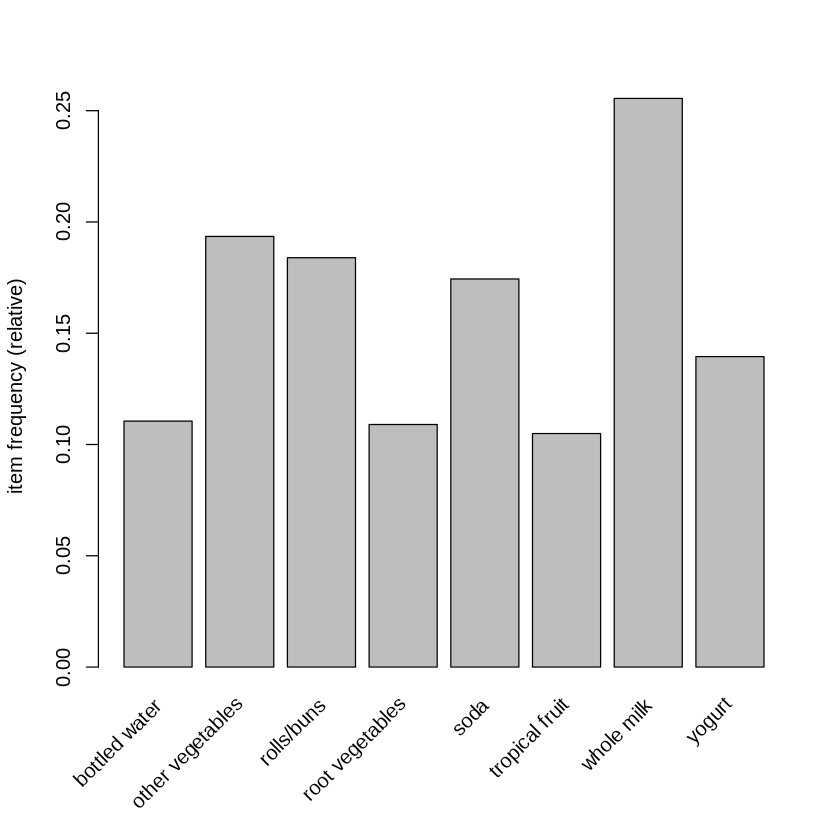

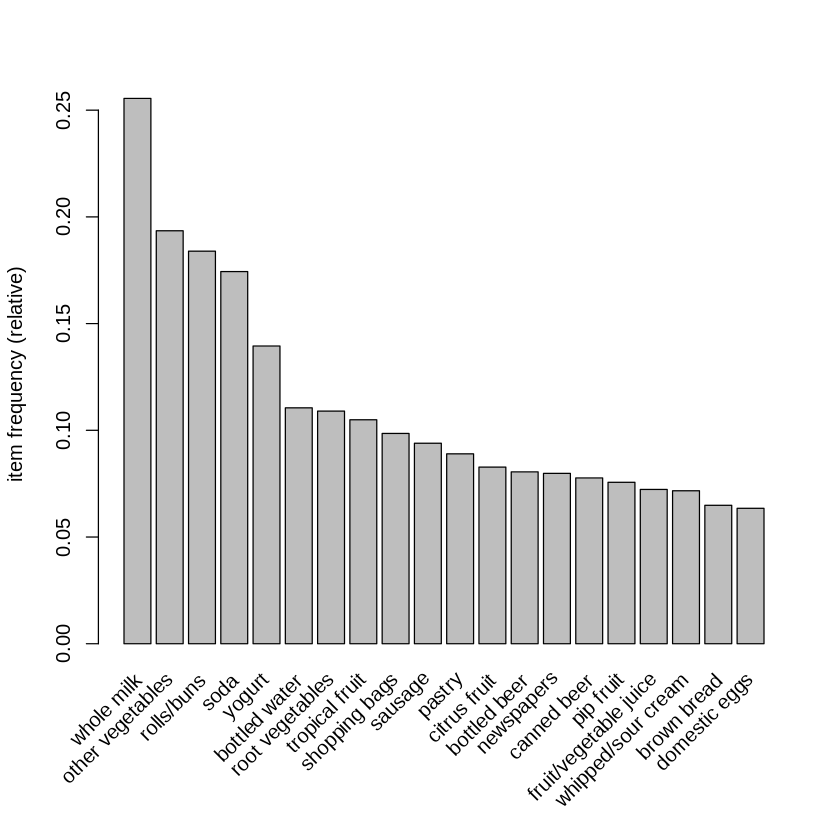

In [ ]:
#plot the frequency of items
itemFrequencyPlot(groceries, support = 0.1)
itemFrequencyPlot(groceries, topN = 20)

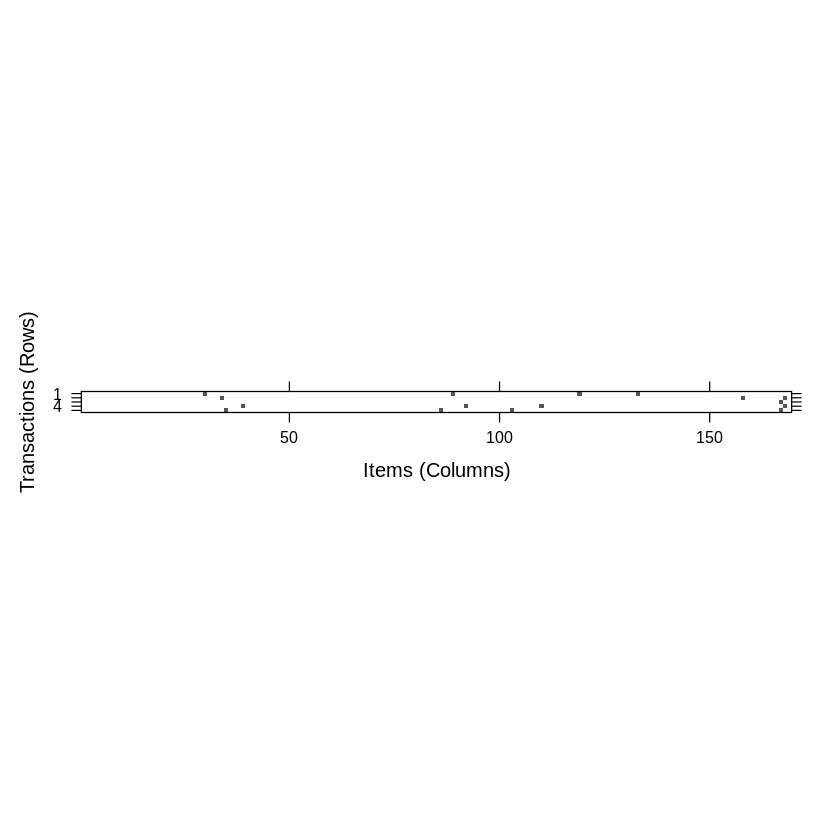

In [ ]:
# a visualization of the sparse matrix for the first five transactions
image(groceries[1:5])

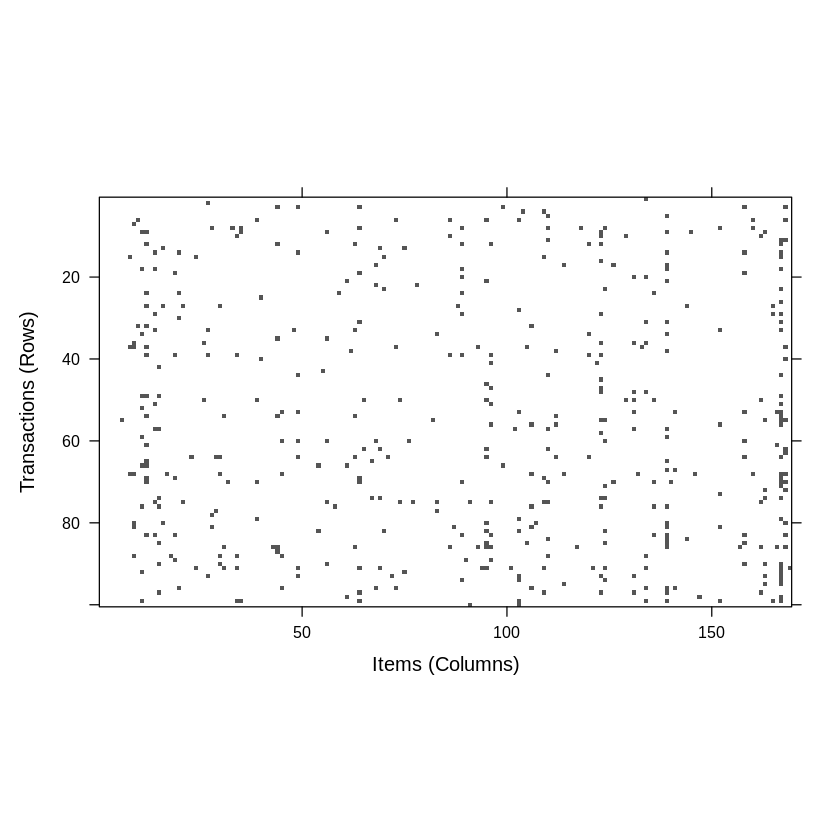

In [ ]:
# visualization of a random sample of 100 transactions
image(sample(groceries, 100))

In [ ]:
#Step 3: Training a model on the data
library(arules)
# default settings result in zero rules learned
apriori(groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 983 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

In [ ]:
#set better support and confidence levels to learn more rules
groceryrules <- apriori(groceries, 
                        parameter = list(support = 0.006, 
                                         confidence = 0.25, 
                                         minlen = 2))
groceryrules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 463 rules 

In [ ]:
### Step 4: Evaluating model performance-----
# summary of grocery association rules
summary(groceryrules)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25
                                                    

In [ ]:
# In the final section of the summary() output, we receive mining information, telling us about how the rules were chosen. 
# Here, we see that the groceries data, which contained 9,835 transactions, 
# was used to construct rules with a minimum support of 0.0006 and minimum confidence of 0.25.

In [ ]:
# The first rule can be read in plain language as, “if a customer buys potted plants, 
# they will also buy whole milk.” With support of 0.007 and confidence of 0.400, 
# we can determine that this rule covers 0.7 percent of the transactions and is correct in 40 percent of purchases involving potted plants. 
# The lift value tells us how much more likely a customer is to buy whole milk relative to the average customer, 
# given that he or she bought a potted plant. Since we know that about 25.6 percent of the customers bought whole milk (support), 
# while 40 percent of the customers buying a potted plant bought whole milk (confidence), 
# we can compute the lift value as 0.40 / 0.256 = 1.56, which matches the value shown.

In [ ]:
# look at the first three rules
inspect(groceryrules[1:3])

    lhs                rhs               support     confidence coverage  
[1] {potted plants} => {whole milk}      0.006914082 0.4000000  0.01728521
[2] {pasta}         => {whole milk}      0.006100661 0.4054054  0.01504830
[3] {herbs}         => {root vegetables} 0.007015760 0.4312500  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   


In [ ]:
### Step 5: Improving model performance-----
#sorting grocery rules by lift
inspect(sort(groceryrules, by = "lift")[1:5])

    lhs                    rhs                      support confidence   coverage     lift count
[1] {herbs}             => {root vegetables}    0.007015760  0.4312500 0.01626843 3.956477    69
[2] {berries}           => {whipped/sour cream} 0.009049314  0.2721713 0.03324860 3.796886    89
[3] {other vegetables,                                                                          
     tropical fruit,                                                                            
     whole milk}        => {root vegetables}    0.007015760  0.4107143 0.01708185 3.768074    69
[4] {beef,                                                                                      
     other vegetables}  => {root vegetables}    0.007930859  0.4020619 0.01972547 3.688692    78
[5] {other vegetables,                                                                          
     tropical fruit}    => {pip fruit}          0.009456024  0.2634561 0.03589222 3.482649    93


In [ ]:
# These rules appear to be more interesting than the ones we looked at previously. 
# The first rule, with a lift of about 3.96, implies that people who buy herbs are nearly four times 
# more likely to buy root vegetables than the typical customer—perhaps for a stew of some sort? Rule two is also interesting. 
# Whipped cream is over three times more likely to be found in a shopping cart with berries versus other carts, 
# suggesting perhaps a dessert pairing?

In [ ]:
### finding subsets of rules containing any berry items ---
berryrules <- subset(groceryrules, items %in% "berries")
inspect(berryrules)

    lhs          rhs                  support     confidence coverage  lift    
[1] {berries} => {whipped/sour cream} 0.009049314 0.2721713  0.0332486 3.796886
[2] {berries} => {yogurt}             0.010574479 0.3180428  0.0332486 2.279848
[3] {berries} => {other vegetables}   0.010269446 0.3088685  0.0332486 1.596280
[4] {berries} => {whole milk}         0.011794611 0.3547401  0.0332486 1.388328
    count
[1]  89  
[2] 104  
[3] 101  
[4] 116  


In [ ]:
#writing the rules to a CSV file
write(groceryrules, file = "groceryrules.csv",
      sep = ",", quote = TRUE, row.names = FALSE)

In [ ]:
#converting the rule set to a data frame
groceryrules_df <- as(groceryrules, "data.frame")
str(groceryrules_df)

'data.frame':	463 obs. of  6 variables:
 $ rules     : chr  "{potted plants} => {whole milk}" "{pasta} => {whole milk}" "{herbs} => {root vegetables}" "{herbs} => {other vegetables}" ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ coverage  : num  0.0173 0.015 0.0163 0.0163 0.0163 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
 $ count     : int  68 60 69 76 76 69 70 67 63 88 ...


In [ ]:
groceryrules_df

,rules,support,confidence,coverage,lift,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,{potted plants} => {whole milk},0.006914082,0.4000000,0.01728521,1.565460,68
2,{pasta} => {whole milk},0.006100661,0.4054054,0.01504830,1.586614,60
3,{herbs} => {root vegetables},0.007015760,0.4312500,0.01626843,3.956477,69
4,{herbs} => {other vegetables},0.007727504,0.4750000,0.01626843,2.454874,76
5,{herbs} => {whole milk},0.007727504,0.4750000,0.01626843,1.858983,76
6,{processed cheese} => {whole milk},0.007015760,0.4233129,0.01657346,1.656698,69
7,{semi-finished bread} => {whole milk},0.007117438,0.4022989,0.01769192,1.574457,70
8,{beverages} => {whole milk},0.006812405,0.2617188,0.02602949,1.024275,67
9,{detergent} => {other vegetables},0.006405694,0.3333333,0.01921708,1.722719,63


# Homework: Online Retail Data Set
https://archive.ics.uci.edu/ml/datasets/online+retail

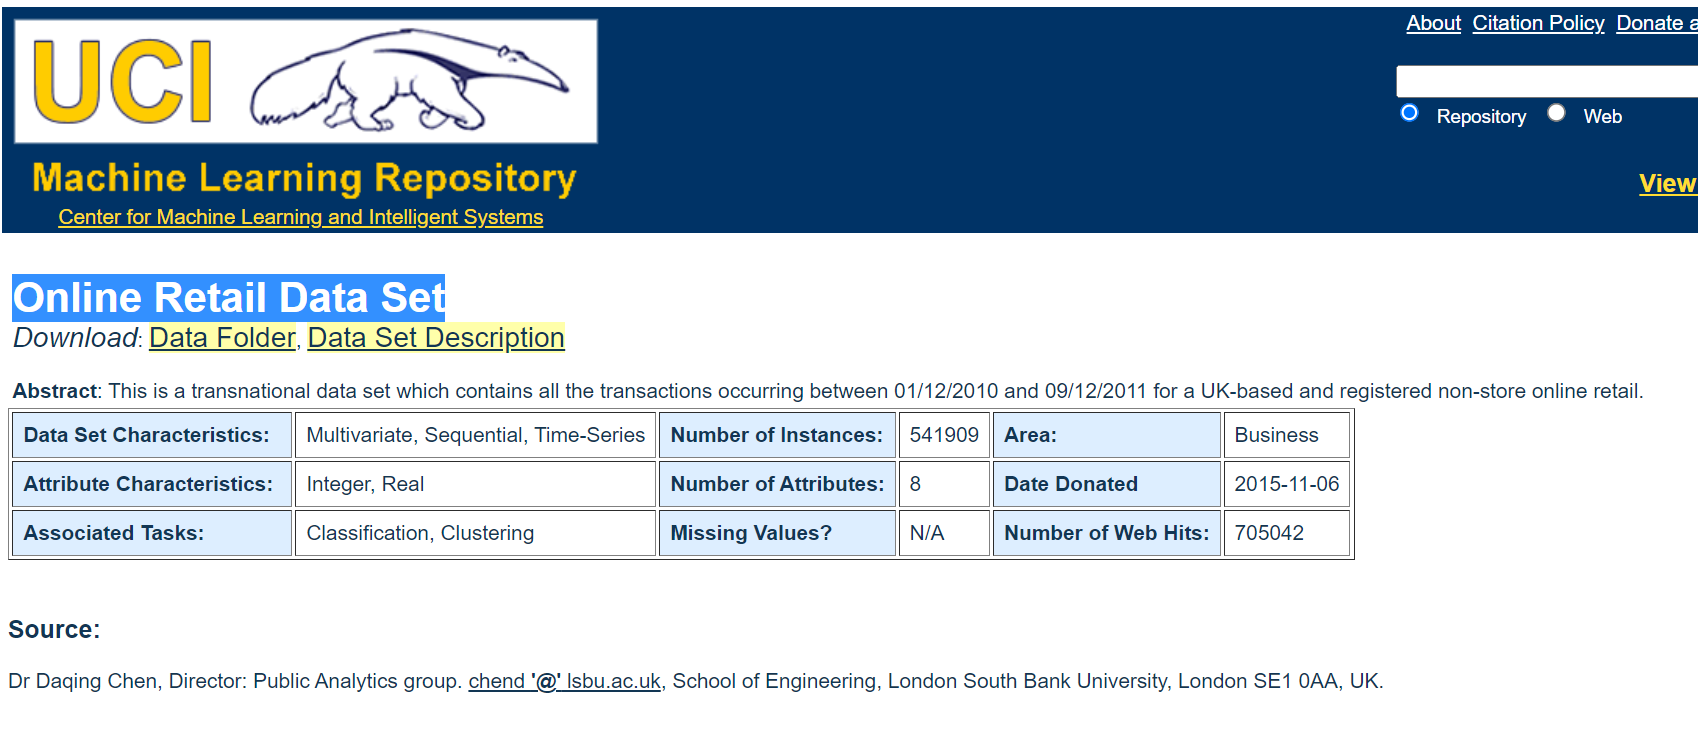

https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx